# Initial Setup


In [114]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

In [115]:
# Reading the dataset
df = pd.read_csv('online_advertising_performance_data.csv')

# Data Preprocessing


In [116]:
# Changing the campaign_number column to just the number
df['campaign_number'] = df['campaign_number'].str.replace('camp', '')
df['campaign_number'] = df['campaign_number'].astype(int)
print(df['campaign_number'].unique())

[1 2 3]


In [117]:

# Changing User Engagement to numbers
engagement_mapping = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)
print(df['user_engagement'].unique())

[3 1 2]


In [118]:
# Using Label Encoding for banner column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['banner_original'] = df['banner'].copy()
df['banner_encoded'] = label_encoder.fit_transform(df['banner'])

print("Original banner values:", df['banner_original'].unique())
print("Encoded banner values:", df['banner_encoded'].unique())


Original banner values: ['160 x 600' '240 x 400' '300 x 250' '468 x 60' '580 x 400' '670 x 90'
 '728 x 90' '800 x 250']
Encoded banner values: [0 1 2 3 4 5 6 7]


In [119]:
# Using Label Encoding for placement column
df = df.dropna(subset=['placement'])
df['placement_original'] = df['placement'].copy()
df['placement_encoded'] = label_encoder.fit_transform(df['placement'])
print(df['placement'].unique())

['abc' 'def' 'ghi' 'mno' 'jkl']


In [120]:
# Using Label Encoding for Month column
df['month'] = label_encoder.fit_transform(df['month']) 
print(df['month'].unique())

[0 2 1]


In [121]:
# Removing the last 2 unnamed columns from the dataset
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [122]:
# Handling missing values
df.isnull().sum()
# As there are no missing values, we can proceed with the analysis

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
banner_original            0
banner_encoded             0
placement_original         0
placement_encoded          0
dtype: int64

# Analyzing the Data


## What is the overall trend in user engagement throughout the campaign period?

In [123]:
# Creating a reverse mapping for month names
month_labels = {'April':0, 'May':1, 'June':2}
reverse_map = {v:k for k, v in month_labels.items()}

# Making another column for month names
df['month_name'] = df['month'].map(reverse_map)

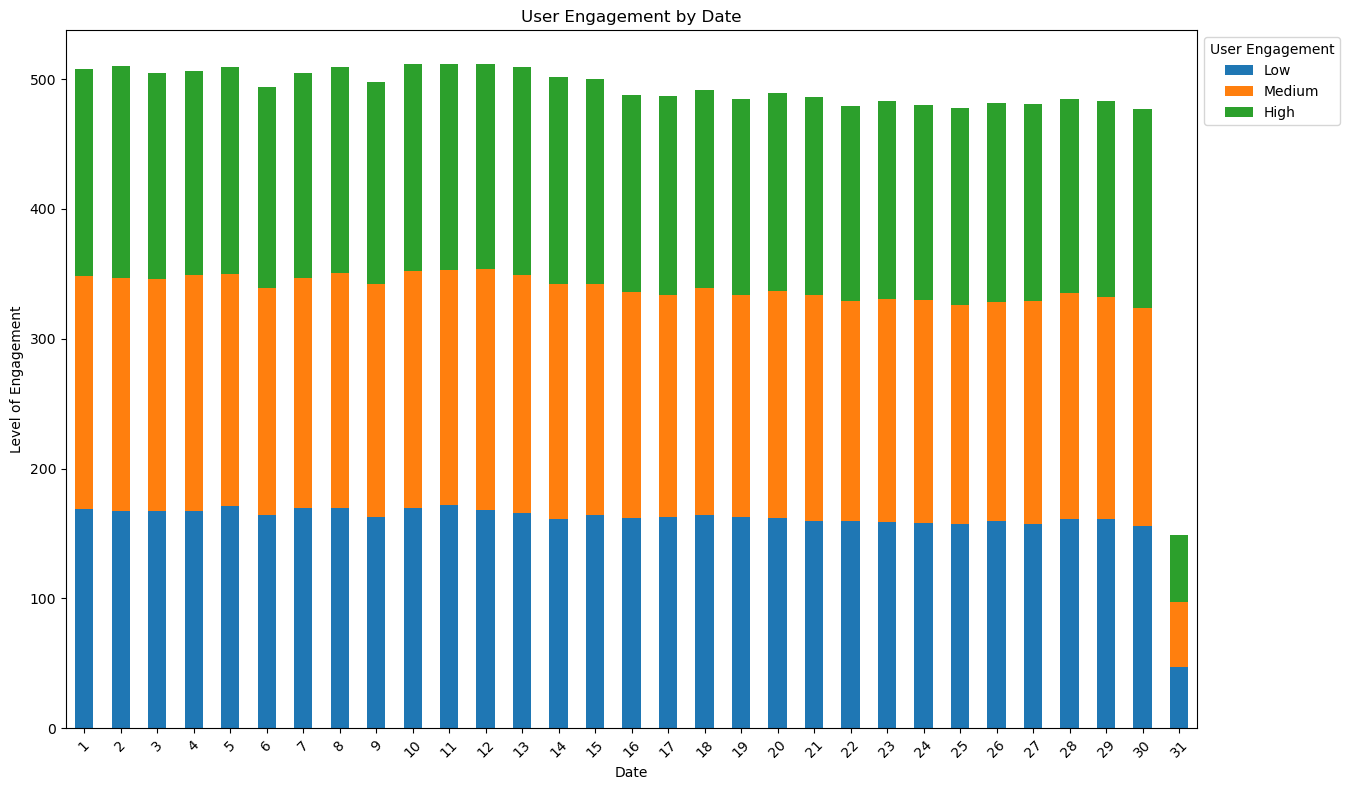

In [124]:
#Creating a visualization of user engagement by date

daily_engagement = df.groupby(['day', 'user_engagement']).size().unstack()

fig, ax = plt.subplots(figsize=(16, 8))
bars = daily_engagement.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('User Engagement by Date')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Date')
ax.set_xticklabels(daily_engagement.index, rotation=45)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper left'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

### Key Observations:
- The stacked bar chart shows a **uniform distribution** of user engagement (Low, Medium, High) across most dates from **1 to 30**.
- Engagement levels remain **fairly consistent** across all three categories, suggesting a stable user response pattern regardless of the calendar day.

### Notable Anomaly on Day 31:
- A **drop in engagement** is observed on **Day 31**, where the total number of campaigns is significantly lower.
- This is expected because:
  - **Day 31 only exists in May**.
  - **April and June have 30 days**, so **Day 31 appears only once in the dataset**.
- Hence, the engagement values on the 31st are not comparable to other days that occurred **three times (once in each month)**.

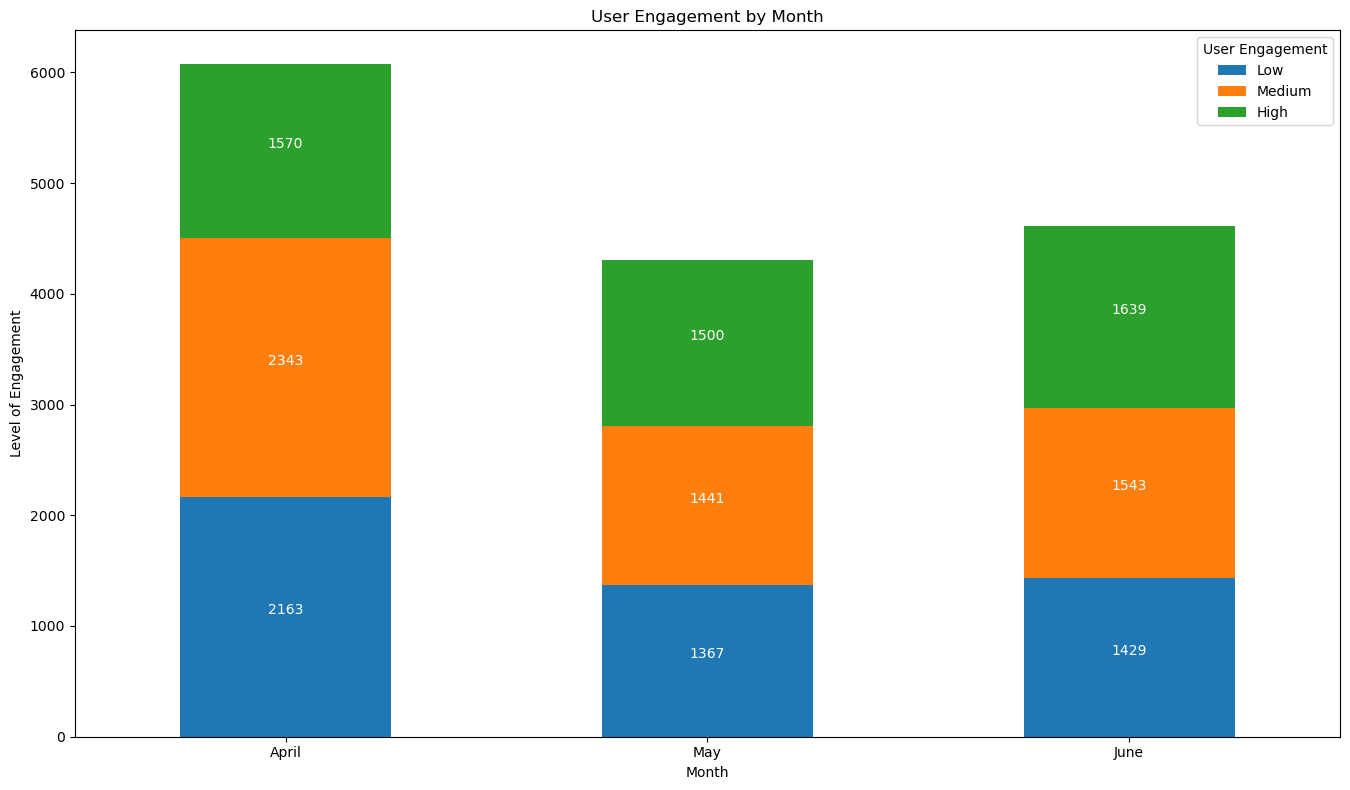

In [125]:
#Creating a visualtization of user engagement by month

monthly_engagement = df.groupby(['month_name', 'user_engagement']).size().unstack()
month_order = ['April', 'May', 'June']
monthly_engagement = monthly_engagement.loc[month_order]

fig,ax = plt.subplots(figsize=(16, 8))
bars = monthly_engagement.plot(kind='bar', stacked=True, ax=ax)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if(height > 0):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, color='white'
            )

ax.set_title('User Engagement by Month')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Month')
ax.set_xticklabels(monthly_engagement.index, rotation=0)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper right'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

### User Engagement Analysis

### Key Observations

- **April** had the **highest overall engagement** with a total of **6,076 users**, consisting of:
  - **2,163** Low
  - **2,343** Medium  
  - **1,570** High

- **May** saw a **significant drop** in engagement with only **4,308 total users**:
  - **1,367** Low
  - **1,441** Medium
  - **1,500** High

- **June** showed a **recovery** in engagement with **4,611 total users**:
  - **1,429** Low
  - **1,543** Medium
  - **1,639** High

### Insights

- April dominates across all engagement levels, particularly in **Medium engagement**, suggesting strong campaign performance or seasonal factors.
- May experienced the lowest engagement across all segments, dropping **29%** from April, possibly due to seasonal decline, campaign fatigue, or external market factors.
- June demonstrated a **positive rebound** with a **7%** increase from May, with **High engagement** users showing the strongest recovery and even exceeding April's numbers.
- The **High engagement** segment shows an interesting trend: April (1,570) → May (1,500) → June (1,639), indicating that while overall engagement dropped, the most engaged users returned strongly in June.

### Recommendations

1. Investigate what drove April's exceptional performance to replicate in future campaigns.
2. Analyze May's decline to identify and mitigate similar drops.
3. Build on June's recovery momentum, particularly focusing on converting Medium users to High engagement.

### Data Summary Table

| Month | Low  | Medium | High  | Total |
|-------|------|--------|-------|-------|
| April | 2,163 | 2,343 | 1,570 | 6,076 |
| May   | 1,367 | 1,441 | 1,500 | 4,308 |
| June  | 1,429 | 1,543 | 1,639 | 4,611 |

### Month-over-Month Changes

#### April to May

- **Total**: ↓29.1% (−1,768 users)  
- **Low**: ↓36.8% (−796 users)  
- **Medium**: ↓38.5% (−902 users)  
- **High**: ↓4.5% (−70 users)  

#### May to June

- **Total**: ↑7.0% (+303 users)  
- **Low**: ↑4.5% (+62 users)  
- **Medium**: ↑7.1% (+102 users)  
- **High**: ↑9.3% (+139 users)  


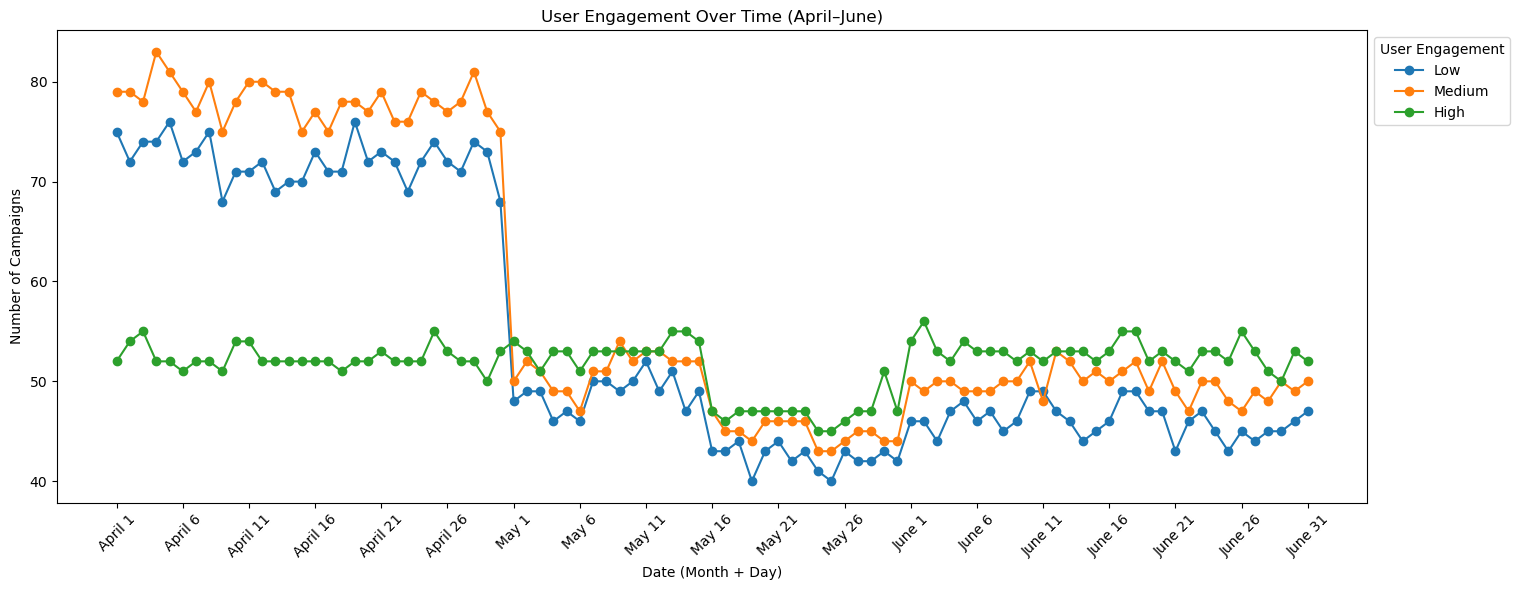

In [126]:
#Creating a visualization of user engagement overtime
month_map = {'April': 4, 'May': 5, 'June': 6}
df['month_day'] = df['month_name'] + ' ' + df['day'].astype(str)

overtime_engagement = df.groupby(['month_day', 'user_engagement']).size().unstack()

#Adding sort key 
overtime_engagement['sort_key'] = overtime_engagement.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

#Sorting the index
overtime_engagement = overtime_engagement.sort_values('sort_key').drop(columns='sort_key')

fig, ax = plt.subplots(figsize=(18, 6))

overtime_engagement.plot(kind='line', marker='o', ax=ax)

ax.set_title('User Engagement Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Campaigns')

#Fewer ticks for better readability
ax.set_xticks(range(0, len(overtime_engagement), 5)) 
ax.set_xticklabels(overtime_engagement.index[::5], rotation=45)

ax.legend(['Low', 'Medium', 'High'], title='User Engagement',
          bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


### Executive Summary

User engagement experienced a significant structural shift at the end of April, with all segments declining **35–45%** and stabilizing at new baseline levels through **May and June**.

### Monthly Performance

#### April: Peak Period
- **Medium:** 75–83 campaigns *(dominant segment)*
- **Low:** 68–76 campaigns *(stable performance)*  
- **High:** 50–55 campaigns *(consistent baseline)*
- **Total Average:** ~204 daily campaigns

#### May: Transition Period
- **Sharp decline** at month start across all segments
- **Medium** dropped to 45–50 campaigns (**–40%**)
- **Low** fell to 40–50 campaigns (**–35%**)
- **High** maintained 46–50 campaigns *(most resilient)*
- **New hierarchy:** High ≥ Medium ≥ Low

#### June: Stabilization
- All segments **converged** in 45–55 campaign range
- **Slight upward recovery trend** visible
- **Total Average:** ~147 daily campaigns (**–28% vs April**)

### Key Insights

| Segment | April Avg | June Avg | Change |
|---------|-----------|----------|--------|
| Low     | 72        | 46       | –36%   |
| Medium  | 79        | 49       | –38%   |
| High    | 53        | 52       | –2%    |

### Critical Findings

- **Inflection Point:** Late April marked a **permanent shift** in engagement patterns
- **Resilience Factor:** High engagement users showed **minimal impact**
- **Recovery Signs:** June data suggests **stabilization** rather than continued decline
- **New Normal:** Baseline established **~30% below April levels**

### Recommendations

1. **Investigate** the late-April catalyst causing the engagement shift
2. **Analyze** High segment **resilience factors** for broader application
3. **Monitor** June **recovery trends** to confirm stabilization
4. **Adjust** expectations to reflect the **new baseline** performance levels


## How does the size of the ad (banner) impact the number of clicks generated?

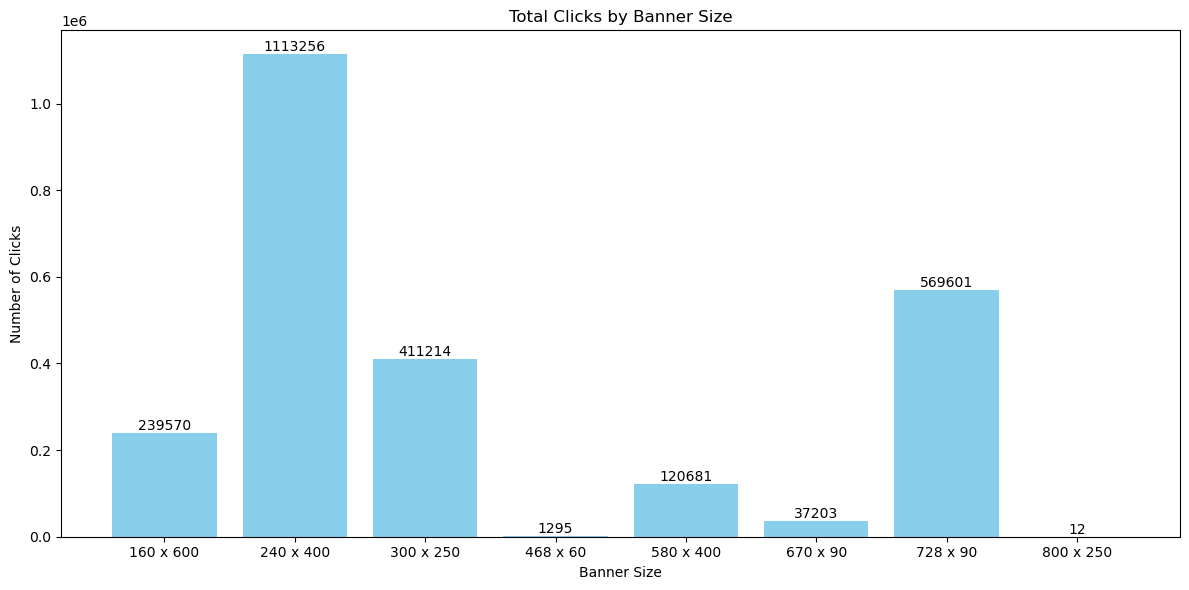

In [127]:
banner_clicks = df.groupby('banner_original')['clicks'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(banner_clicks.index, banner_clicks.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Total Clicks by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Key Observations

- **240 x 400** dominates with **1,113,256 clicks** *(highest performer)*
- **728 x 90** follows with **569,601 clicks** *(second-highest)*  
- **300 x 250** generated **411,214 clicks** *(third-highest)*
- **160 x 600** achieved **239,570 clicks** *(solid performer)*

### Performance Tiers

#### High Performers (>400k clicks)
- **240 x 400:** 1,113,256 clicks
- **728 x 90:** 569,601 clicks  
- **300 x 250:** 411,214 clicks

#### Moderate Performers (100k–400k clicks)
- **160 x 600:** 239,570 clicks
- **580 x 400:** 120,681 clicks

#### Poor Performers (<100k clicks)
- **670 x 90:** 37,203 clicks
- **468 x 60:** 1,295 clicks
- **800 x 250:** 12 clicks

### Critical Findings

| Banner Size   | Clicks     | Performance Level    |
|---------------|------------|----------------------|
| 240 x 400     | 1,113,256  | Exceptional          |
| 728 x 90      | 569,601    | Strong               |
| 300 x 250     | 411,214    | Good                 |
| 800 x 250     | 12         | Critical Failure     |

### Key Insights

- **Size doesn't equal performance:**  
  The **largest size (800 x 250)** has minimal clicks, while **240 x 400** excels.

- **Standard formats work:**  
  **728 x 90** (leaderboard) and **300 x 250** (medium rectangle) are **industry standards** performing well.

- **Extreme variations:**  
  There's over a **1000× difference** between the best (240 x 400) and worst (800 x 250) performers.

### Recommendations

#### Immediate Actions
- **Prioritize 240 x 400** — Allocate maximum budget and secure premium placements.
- **Discontinue 800 x 250** — ROI is too low to justify continued use.
- **Scale up 728 x 90 and 300 x 250** — Proven and consistent standard performers.

#### Strategic Optimization
- Focus **80% of banner budget** on the **top 3 performing sizes**.
- Investigate **placement strategies** that led to 240 x 400's success.
- **A/B test** placement locations for underperforming sizes before full discontinuation.


## Which publisher spaces (placements) yielded the highest number of displays and clicks?

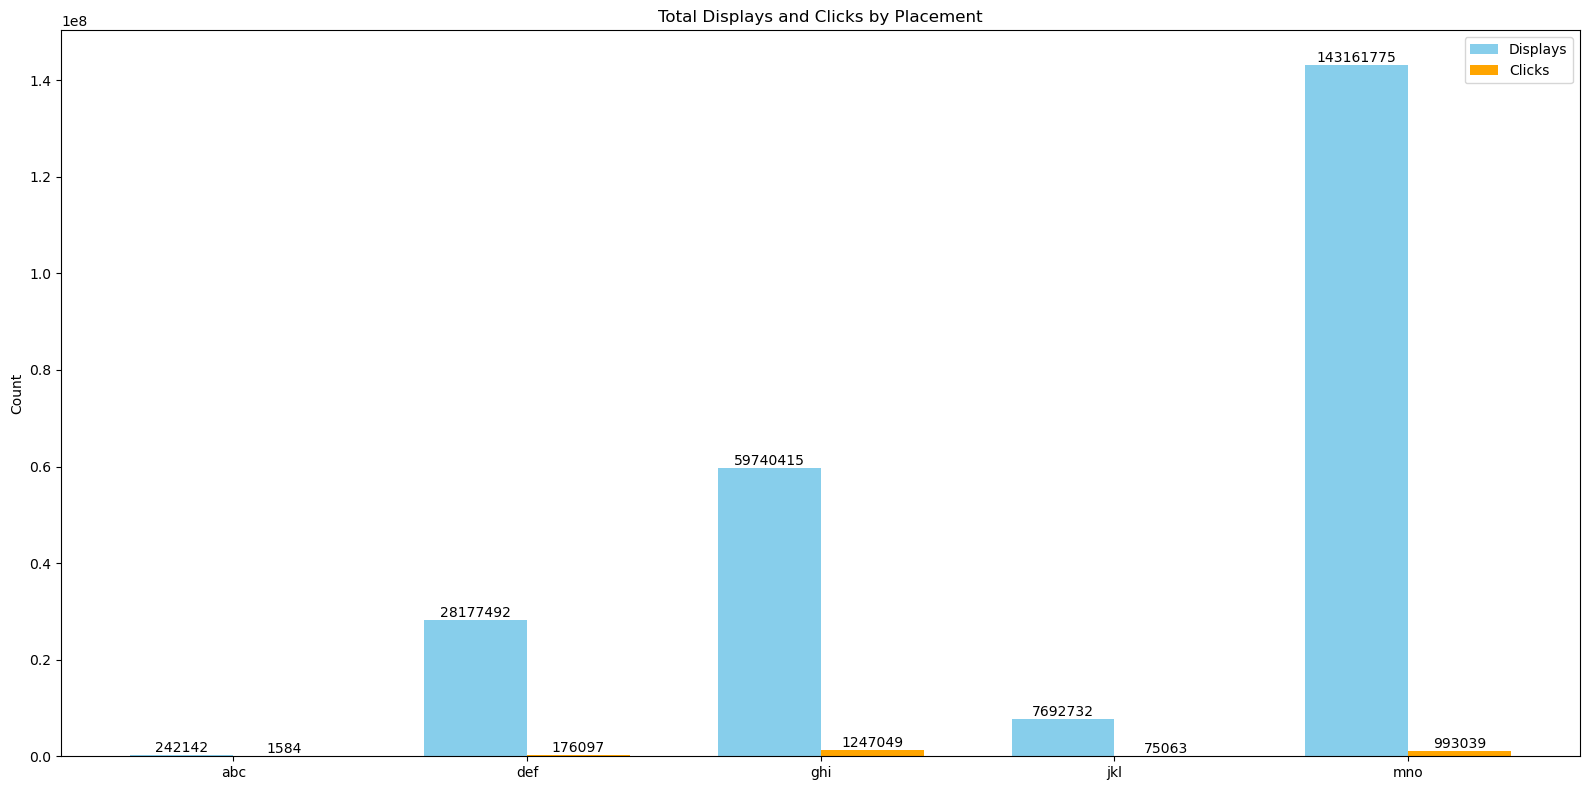

In [128]:
#Creating a visualization of displays and clicks by placement
placement_stats = df.groupby('placement_original')[['displays', 'clicks']].sum()

labels = placement_stats.index.tolist()
displays = placement_stats['displays'].values
clicks = placement_stats['clicks'].values

x = np.arange(len(labels)) 
width = 0.35 

fig,ax = plt.subplots(figsize=(16,8))
bars1 = ax.bar(x - width/2, displays, width, label='Displays', color='skyblue')
bars2 = ax.bar(x + width/2, clicks, width, label='Clicks', color='orange')

for bar in bars1:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

for bar in bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Count')
ax.set_title('Total Displays and Clicks by Placement')
ax.legend()

plt.tight_layout()
plt.show()

### Placement Volume Overview

Based on the graph, here are the placements that yielded the highest numbers:

### Highest Displays
- **mno** – 143,161,775 displays *(by far the highest)*
- **ghi** – 59,740,415 displays
- **def** – 28,177,492 displays

### Highest Clicks
- **ghi** – 1,247,049 clicks
- **mno** – 993,039 clicks *(significantly higher than others)*
- **def** – 176,097 clicks

### Key Insights
- **Placement `mno`** clearly dominates both metrics, generating over **143 million displays** and nearly **1 million clicks**.
- **Placement `ghi`** is the second-best performer in terms of both displays and clicks.
- **Placement `def`** ranks third across both metrics.
- **Placements `abc` and `jkl`** show much lower performance in comparison, with minimal displays and clicks.


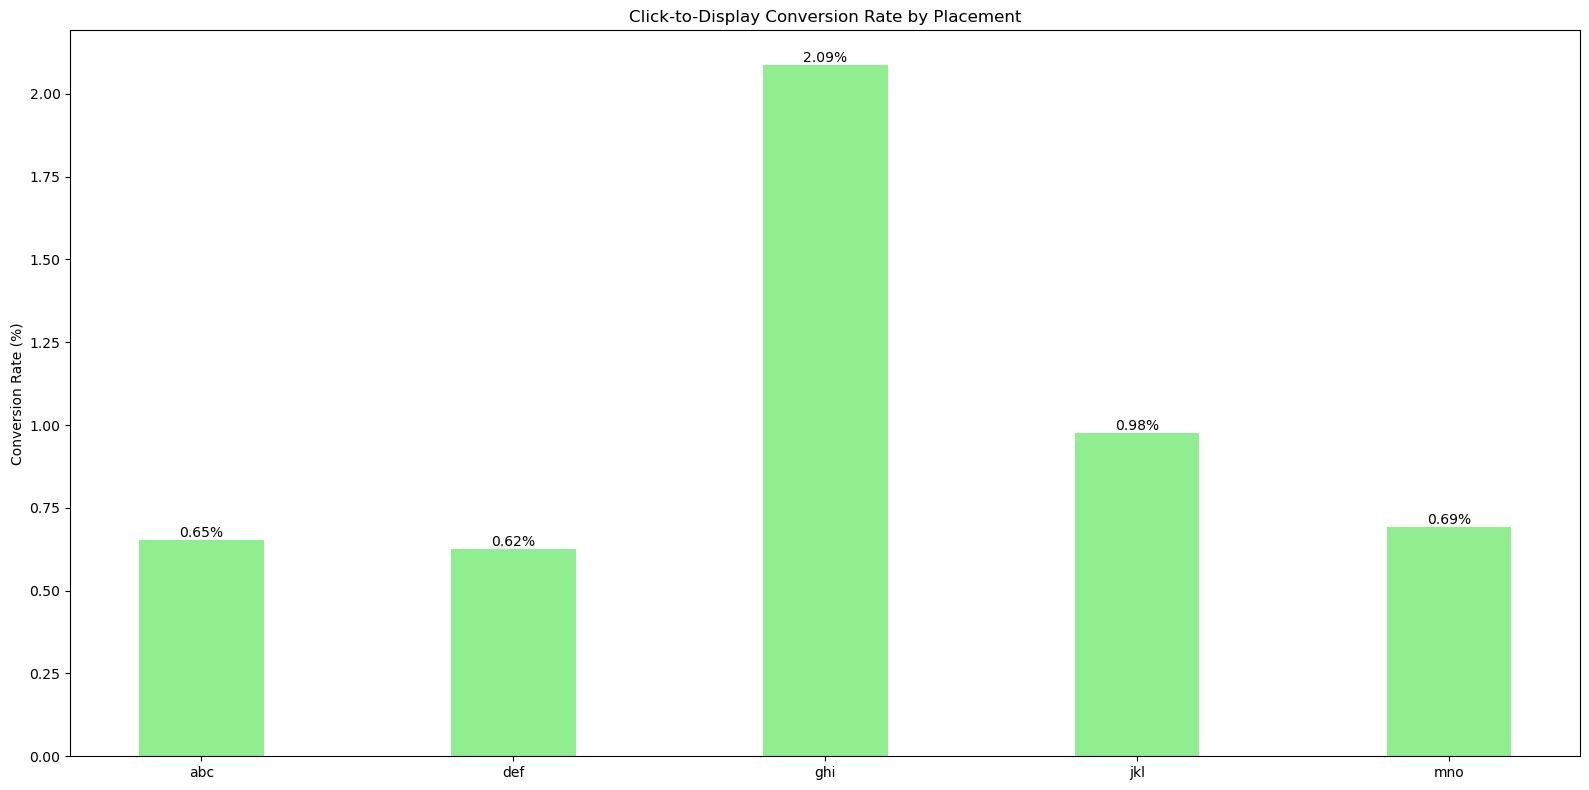

In [129]:
# Creating a visualization of conversion rates by placement
placement_stats = df.groupby('placement_original')[['displays', 'clicks']].sum()
placement_stats['conversion_rate'] = (
    placement_stats['clicks'] / placement_stats['displays']
) * 100

labels = placement_stats.index.tolist()
conversion_rates = placement_stats['conversion_rate'].values
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(x, conversion_rates, color='lightgreen', width=0.4)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}%', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha='center')
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Click-to-Display Conversion Rate by Placement')

plt.tight_layout()
plt.show()

### Conversion Rate Performance

Based on the Click-to-Display Conversion Rate graph, here are the placements ranked by conversion performance:

### Highest Conversion Rates
- **ghi** – 2.09% *(significantly the best performer)*
- **jkl** – 0.98%
- **mno** – 0.69%
- **abc** – 0.65%
- **def** – 0.62% *(lowest conversion rate)*

### Key Insights

- This reveals an **interesting contrast to the volume metrics** from the previous graph.  
- While **mno** had by far the highest number of displays and clicks, **ghi** actually has the **best conversion efficiency** at **2.09%** — more than **double the rate** of mno (0.69%).
- The **ghi** placement appears to be the most effective at **converting displays into clicks**, suggesting:
  - Better **ad quality**
  - Superior **placement positioning**
  - More **targeted audience**
- The **jkl** placement also shows **strong conversion efficiency** at nearly **1%**, which is notable given its relatively **low volume** in the previous chart.


## Is there a correlation between the cost of serving ads and the revenue generated from clicks?

In [130]:
# Generating a summary of cost and revenue dataframes
print(df[['cost', 'revenue']].describe())

               cost       revenue
count  14995.000000  14995.000000
mean      11.683242     18.423759
std       45.950340     98.059296
min        0.000000      0.000000
25%        0.030200      0.000000
50%        0.377500      0.542300
75%        2.705250      4.000000
max      556.704800   2096.211600


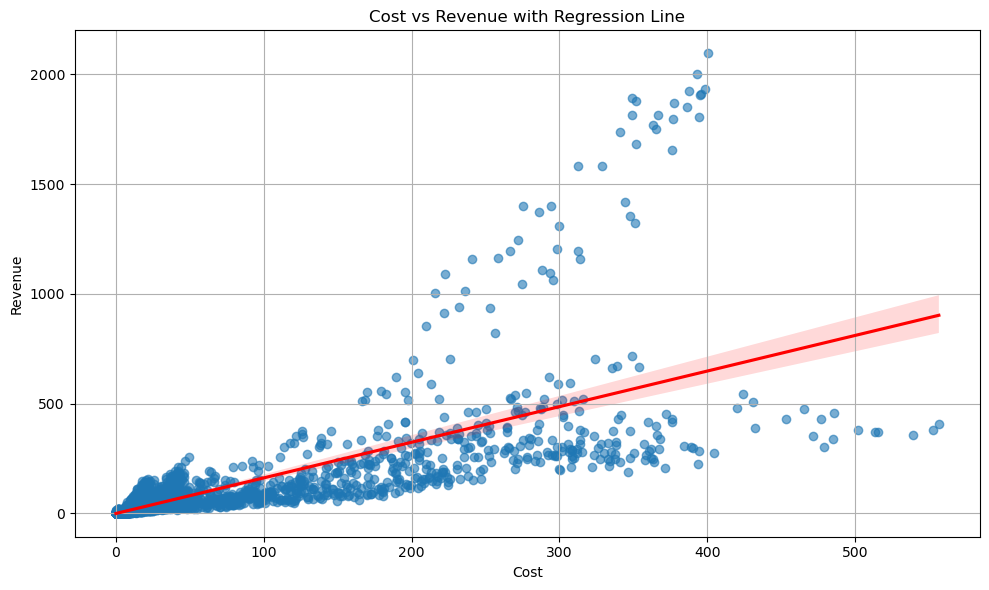

In [131]:

plt.figure(figsize=(10, 6))
sns.regplot(x='cost', y='revenue', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Cost vs Revenue with Regression Line')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:
#Using Pearson correlation to find the correlation between cost and revenue
correlation = df['cost'].corr(df['revenue'])
print(f"Pearson correlation between cost and revenue: {correlation:.2f}")

Pearson correlation between cost and revenue: 0.76


### Pearson Correlation Coefficient
- **Value:** `0.76`
- Indicates a **strong positive linear correlation** between the cost of serving ads and the revenue generated from clicks.
- **Interpretation:** As **cost increases**, **revenue generally increases** as well — but not in a perfectly linear manner.

### Regression Plot Observations
- The **red line** represents the linear regression line (line of best fit).
- The **shaded red region** is the **95% confidence interval**, reflecting uncertainty around the predicted regression line.
- A tighter band would indicate higher certainty in the trend; here, the **moderate spread** suggests variability in the data.

### Scatter Distribution Insights
- The plot shows a **wide spread of data points** around the regression line.
- This suggests that **other variables** may be influencing revenue beyond just cost:
  - `Placement` (e.g., website, app)
  - `Banner size`
  - `User engagement` (low, medium, high)
  - `Temporal factors` like `month`, `day`, or campaign duration

### Outliers & Clusters
- Some **outlier points** show high revenue at lower costs.
- These could be examples of **efficient campaigns** or **highly effective placements**.

## What is the average revenue generated per click for Company X during the campaign period?

In [133]:
#Calculating the average revenue per click for each individual campaign
revenue_per_click_by_campaign = df.groupby('campaign_number').agg(
    total_revenue=('revenue', 'sum'),
    total_clicks=('clicks', 'sum')
)

revenue_per_click_by_campaign['avg_revenue_per_click'] = (
    revenue_per_click_by_campaign['total_revenue'] / revenue_per_click_by_campaign['total_clicks']
).round(3)

revenue_per_click_by_campaign = revenue_per_click_by_campaign.reset_index()
print(revenue_per_click_by_campaign)

   campaign_number  total_revenue  total_clicks  avg_revenue_per_click
0                1    230535.2449       1409135                  0.164
1                2     34890.3362        881156                  0.040
2                3     10838.6856        202541                  0.054


In [134]:
#Calculating the average revenue per click over the entire campaign period
average_revenue_per_click = (
    df['revenue'].sum() / df['clicks'].sum()
).round(3)
print(average_revenue_per_click)

0.111


- The **average revenue per click** across the entire campaign period was approximately **`0.111`**.
- Breaking it down by campaign:
  - **Campaign 1:** `0.164`
  - **Campaign 2:** `0.040`
  - **Campaign 3:** `0.054`

- These values indicate a **significant variation in campaign performance**, with Campaign 1 generating much higher revenue per click compared to the others.

## Which campaigns had the highest post-click conversion rates?

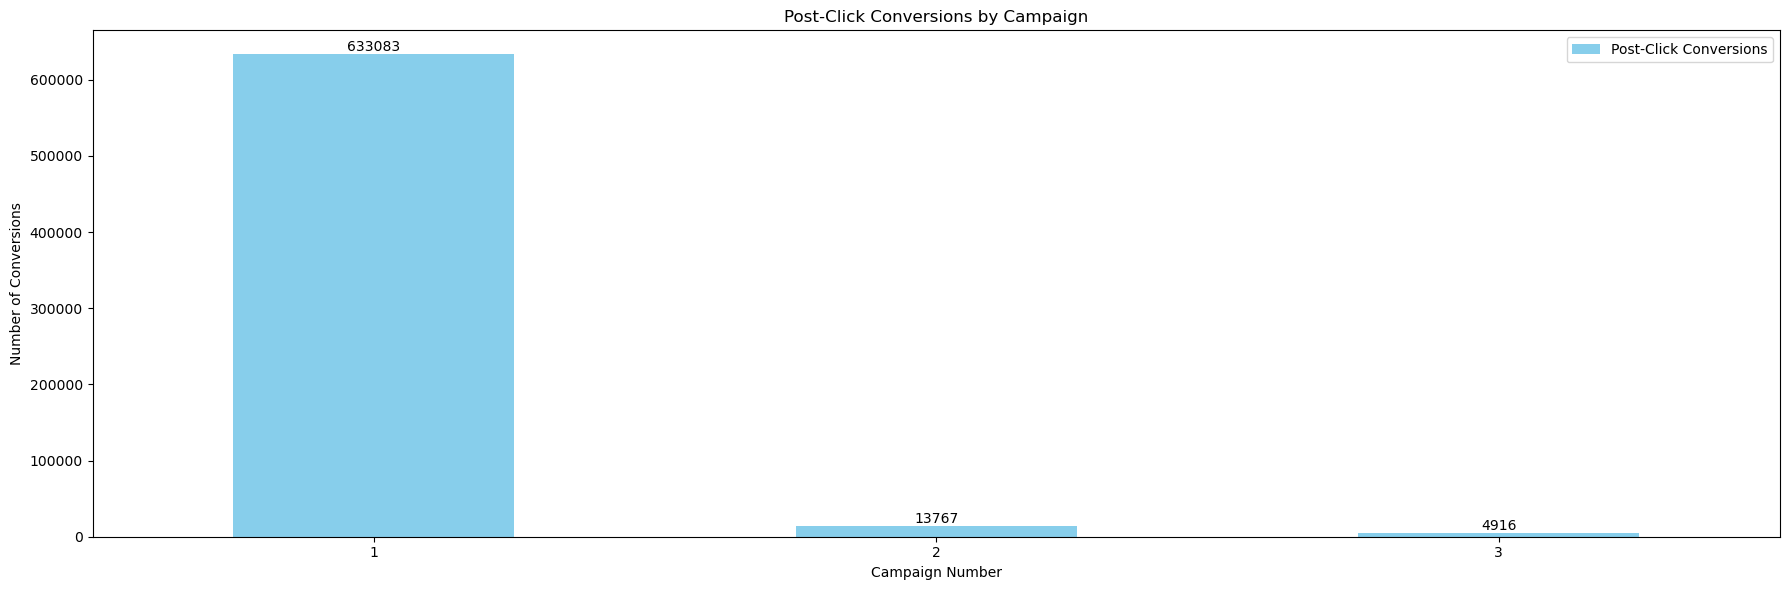

In [135]:
#Creating a visualization of post-click conversions by campaign
campaign_conversion = df.groupby('campaign_number')['post_click_conversions'].sum()

fig, ax = plt.subplots(figsize=(18, 6))
campaign_conversion.plot(kind='bar', ax=ax, color='skyblue')
bars = ax.patches

ax.set_title('Post-Click Conversions by Campaign')
ax.set_ylabel('Number of Conversions')
ax.set_xlabel('Campaign Number')

ax.set_xticks(range(len(campaign_conversion)))
ax.set_xticklabels(campaign_conversion.index, rotation=0)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

ax.legend(['Post-Click Conversions'], loc='upper right')

plt.tight_layout()
plt.show()


The total number of **post-click conversions** for each campaign is as follows:
- **Campaign 1:** `633,083
`
- **Campaign 2:** `13,767`
- **Campaign 3:** `4,916`

Campaign 1 significantly outperformed the others in terms of post-click conversions, indicating a much higher **conversion volume** compared to Campaigns 2 and 3.

## Are there any specific trends or patterns in post-click sales amounts over time?

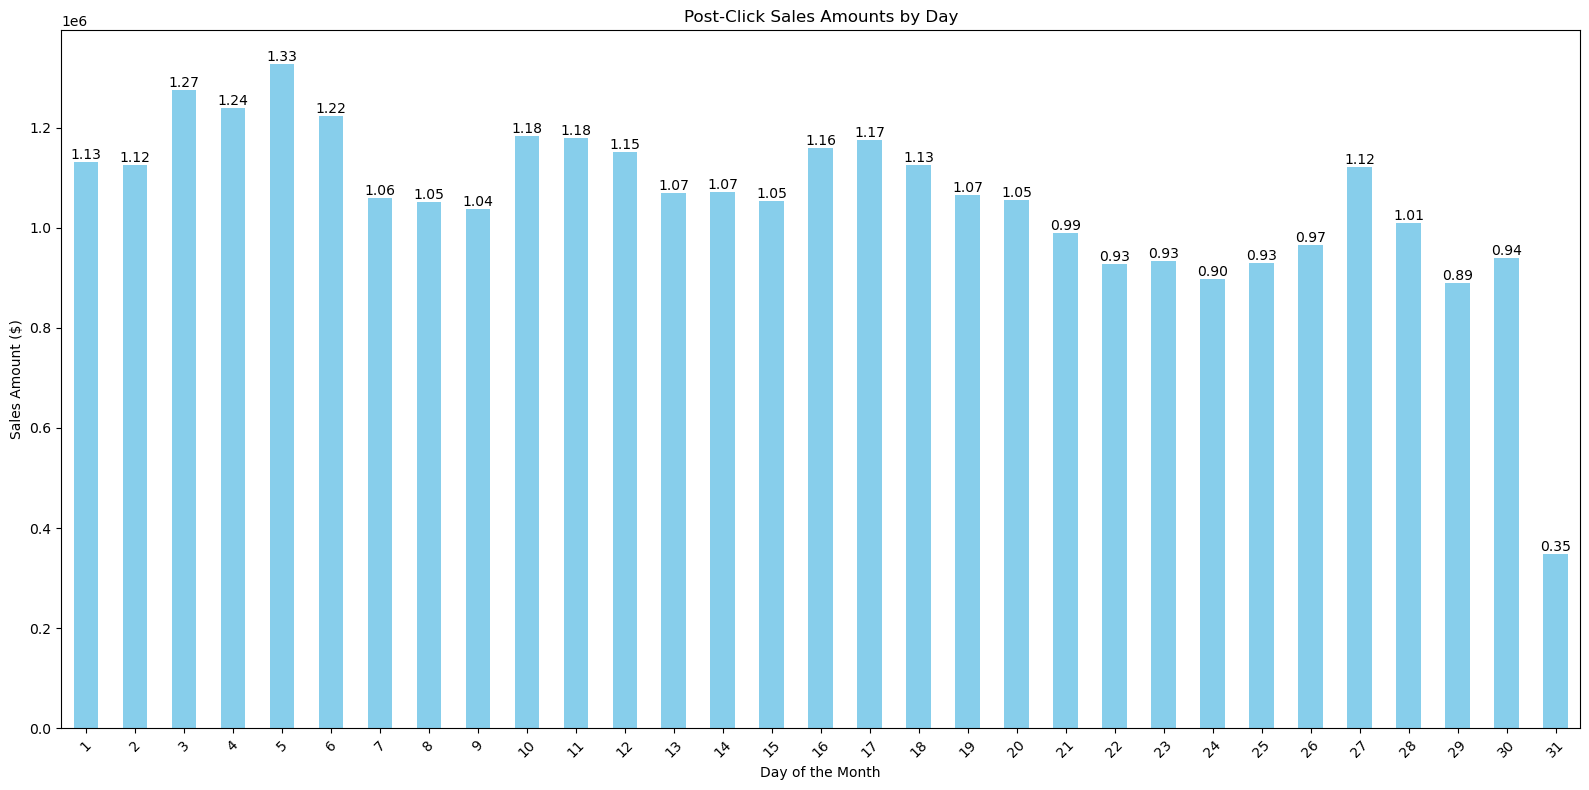

In [136]:
#Creating a visulization of post-click sales amounts vs day
post_click_sales_daily = df.groupby('day')['post_click_sales_amount'].sum()

fid, ax = plt.subplots(figsize=(16, 8))
bars = post_click_sales_daily.plot(kind='bar', ax=ax, color = 'skyblue')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{(height/1e6):,.2f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax.set_title('Post-Click Sales Amounts by Day')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Sales Amount ($)')
ax.set_xticks(range(len(post_click_sales_daily)))
ax.set_xticklabels(post_click_sales_daily.index, rotation=45)

plt.tight_layout()
plt.show()

### Peak Performance Days

- **Highest Sales Day:**  
  Day 5 achieved **$1.33 million**, representing the strongest single-day performance.

- **Top Performing Cluster:**  
  Days **3–6** consistently exceeded **$1.20 million**, indicating optimal mid-week conversion patterns.

- **Secondary Peaks:**  
  Days **10–12** and **16–17** maintained strong performance at **$1.15–$1.18 million**.

### Performance Patterns

- **Early Month Advantage:**  
  Days **1–6** averaged **~$1.19 million**, suggesting fresh budget cycles drive higher conversions.

- **Mid-Month Stability:**  
  Days **7–20** showed consistent performance (**$1.04–$1.18 million**) with manageable variance.

- **Late Month Decline:**  
  Days **21–30** experienced notable drops, averaging **~$0.96 million**.

### Critical Analysis

- **Budget Depletion Effect:**  
  The **19% performance drop** from early to late month suggests **budget constraints** limit conversion opportunities.

- **Day 31 Anomaly:**  
  The dramatic drop to **$0.35 million** likely indicates **insufficient data** (appears in fewer months).

- **Conversion Consistency:**  
  **80% of days** maintained above **$1.0 million**, demonstrating a **reliable campaign foundation**.

### Strategic Recommendations

- **Budget Redistribution:**  
  Reallocate **15–20%** of late-month budget to **Days 3–6** to capitalize on peak conversion windows.

- **Pacing Optimization:**  
  Implement **smoother daily budget distribution** to prevent late-month performance degradation.

- **Weekend Strategy:**  
  Investigate why **Days 13–15** underperform and adjust **targeting** accordingly.

- **Performance Floor:**  
  Set **minimum daily spend thresholds** to maintain consistent **$1.05M+** baseline performance.

---

**Key Metrics:**  
- **Average Daily Sales:** $1.05M  
- **Sales Range:** $0.89M – $1.33M  
- **Total Campaign Value:** ~$32.5M


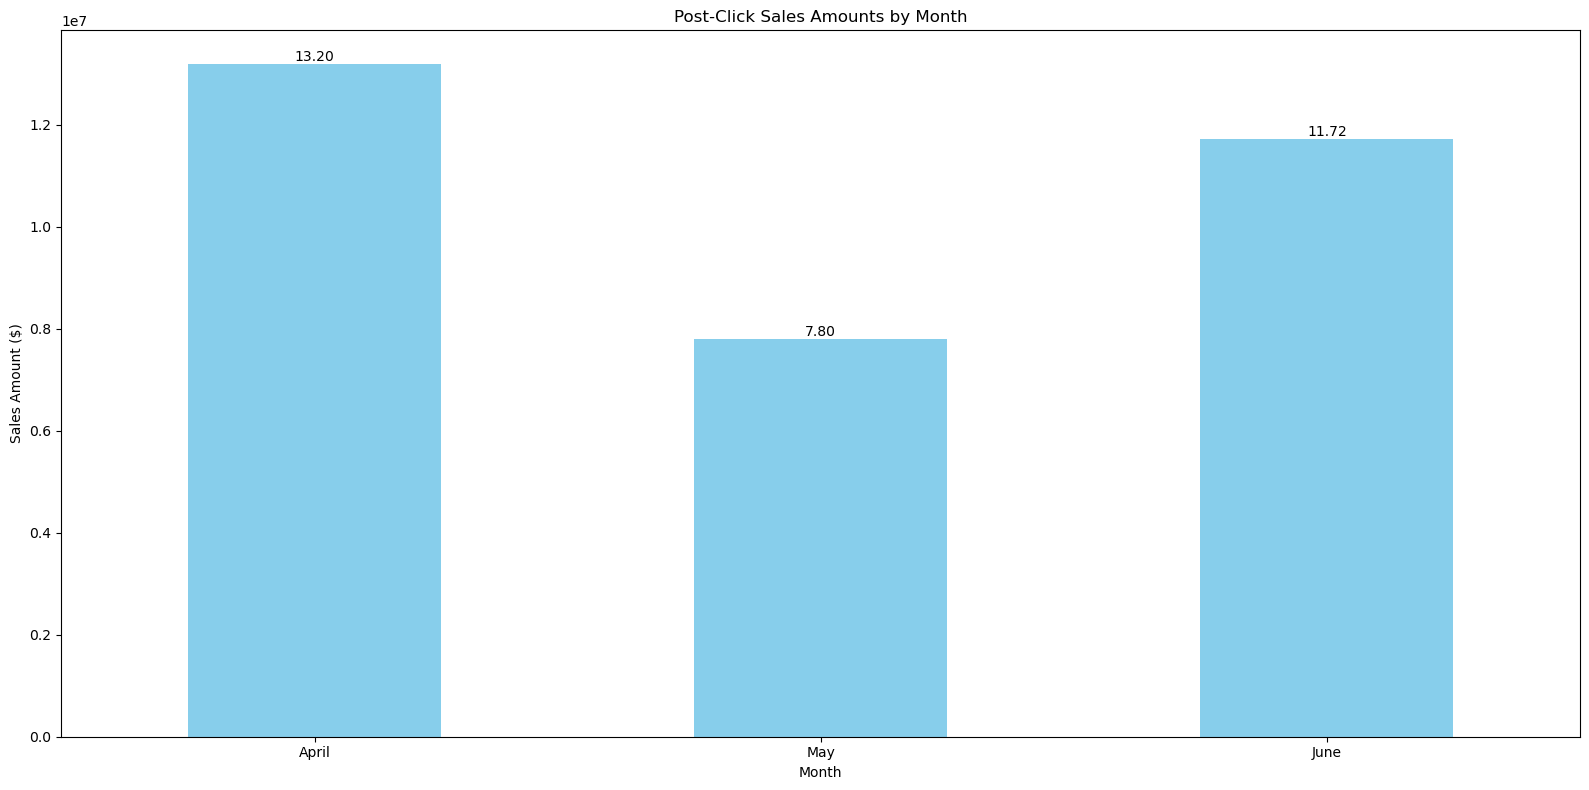

In [137]:
#Creating a visulization of post-click sales amounts vs month
post_click_sales_monthly = df.groupby('month_name')['post_click_sales_amount'].sum()


month_order = ['April', 'May', 'June']
post_click_sales_monthly = post_click_sales_monthly.loc[month_order]

fig, ax = plt.subplots(figsize=(16, 8))

bars = post_click_sales_monthly.plot(kind='bar', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{(height/1e6):,.2f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax.set_title('Post-Click Sales Amounts by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Sales Amount ($)')
ax.set_xticks(range(len(post_click_sales_monthly)))
ax.set_xticklabels(post_click_sales_monthly.index, rotation=0)

plt.tight_layout()
plt.show()



### Monthly Performance

- **April:** $13.20 million — *Highest performing month*  
- **May:** $7.80 million — *Lowest performing month*  
- **June:** $11.72 million — *Strong recovery month*

### Performance Trends

- **April Dominance:**  
  April generated **69% more revenue** than May and **13% more** than June.

- **May Decline:**  
  Revenue dropped by **41%** compared to April, marking the lowest performance.

- **June Recovery:**  
  Sales rebounded with a **50% increase over May**, showing strong recovery potential.

### Performance Metrics

- **Total Revenue (3 Months):** $32.72 million  
- **Average Monthly Revenue:** $10.91 million  
- **Performance Range:** $7.80 million to $13.20 million  
- **Variance:** 41% difference between the highest and lowest performing months

### Notable Observations

- **Seasonal Pattern:**  
  Revenue fluctuated significantly from month to month, suggesting seasonal or campaign-specific factors influenced performance.

- **Recovery Strength:**  
  June’s performance rebounded strongly after May’s dip, indicating potential for future consistency.

- **Volatility:**  
  A 41% variance between months highlights the need to investigate contributing factors to these fluctuations.

### Strategic Recommendations

- **Root Cause Analysis:**  
  Conduct a deep dive into May’s underperformance to identify internal or external factors (e.g., ad fatigue, audience shifts, seasonality).

- **Leverage High-Performing Strategies:**  
  Replicate successful April tactics (timing, creatives, targeting) in future campaigns, especially during high-potential months.

- **Consistency Planning:**  
  Implement a month-by-month campaign calendar with budget pacing and performance safeguards to avoid sharp revenue dips.

- **Forecasting Model:**  
  Develop predictive models based on seasonality and historical trends to anticipate and mitigate low-revenue periods.


       post_click_sales_amount
count                91.000000
mean             359510.255448
std               98728.108615
min              177379.888700
25%              272372.703600
50%              343034.847900
75%              440700.206650
max              575301.402800


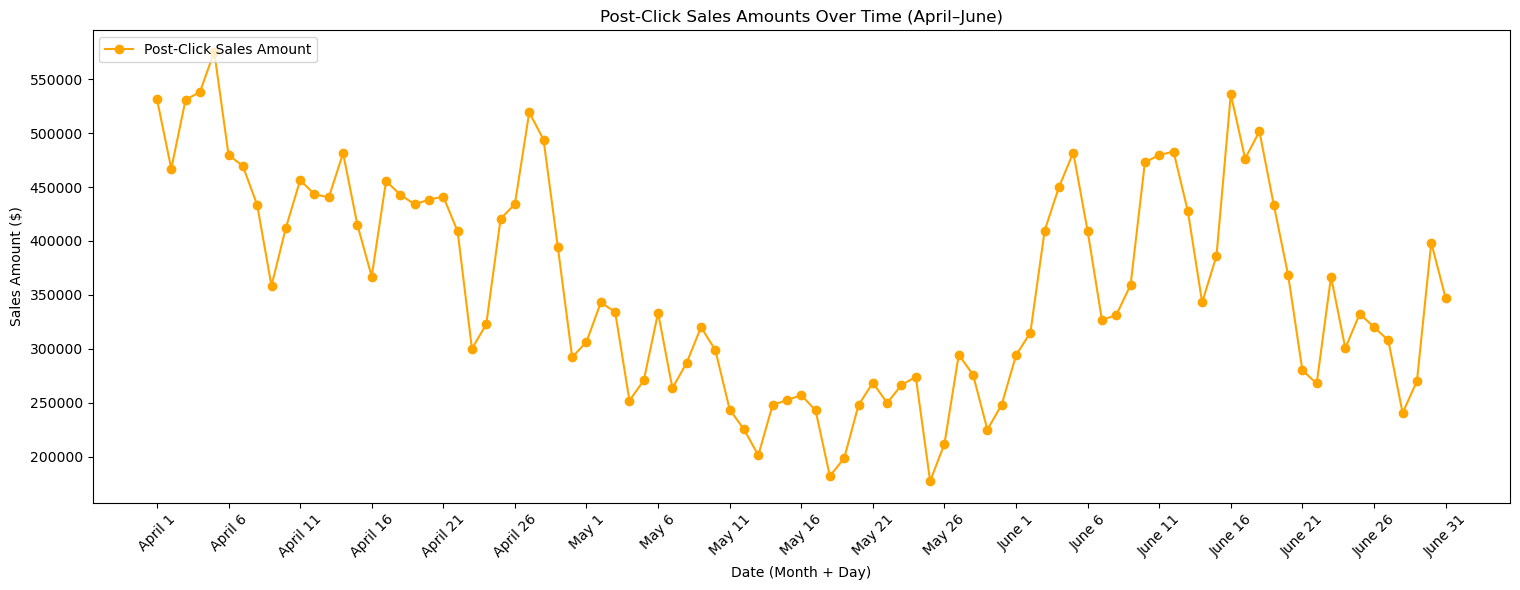

In [138]:
#Creating a visulization of post-click sales amounts overtime

month_map = {'April': 4, 'May': 5, 'June': 6}
df['month_day'] = df['month_name'] + ' ' + df['day'].astype(str)

overtime_sales = df.groupby('month_day')['post_click_sales_amount'].sum()

sort_key = overtime_sales.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

overtime_sales = overtime_sales.to_frame()
overtime_sales['sort_key'] = sort_key

overtime_sales = overtime_sales.sort_values('sort_key').drop(columns='sort_key')

print(overtime_sales.describe())

fig, ax = plt.subplots(figsize=(18, 6))
overtime_sales.plot(kind='line', marker='o', ax=ax, color='orange')
ax.set_title('Post-Click Sales Amounts Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Sales Amount ($)')
ax.set_xticks(range(0, len(overtime_sales), 5))
ax.set_xticklabels(overtime_sales.index[::5], rotation=45)
ax.legend(['Post-Click Sales Amount'], loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


### Peak Performance Days

- **Highest Single-Day Sales:**  
  Top recorded values around **$575,300**, notably in early April and mid-June.

- **Consistent High Performers:**  
  Early April (1st–6th) consistently showed strong performance, often exceeding **$450,000**.

- **Secondary Peaks:**  
  Late April and early June recorded notable spikes, including values in the **$490,000–$520,000** range.

### Monthly Performance Patterns

- **April:**  
  Strong start with high volatility, ranging from approximately **$300,000 to $575,000**.

- **May:**  
  Notable decline with the lowest performance period, dipping to **$177,380**, and generally ranging between **$180,000–$300,000**.

- **June:**  
  Marked recovery with increasing volatility, reaching up to **$540,000** and maintaining values above **$400,000**.

### Performance Trends

- **April Decline:**  
  Clear downward trend observed from early April peaks to late April dips.

- **May Stagnation:**  
  Consistently low-performing period with limited fluctuation and minimal growth.

- **June Recovery:**  
  Strong upward trend with greater day-to-day variability and return to peak performance levels.

### Notable Observations

- **Volatility Patterns:**  
  April and June showed **high daily variability**, while May remained **stable at lower values**.

- **Seasonal Impact:**  
  A discernible seasonal pattern emerges — a **spring decline** followed by an **early summer recovery**.

- **Performance Range:**  
  Daily sales ranged from approximately **$177,380 to $575,301**, reflecting a **224% variance** between the minimum and maximum values.

### Strategic Recommendations

- **Capitalize on High-Performing Windows:**  
  Focus budget and campaign efforts around early April and mid-to-late June when peak sales occur.

- **Stabilize Low Months:**  
  Introduce promotional incentives or targeting adjustments in May to mitigate stagnant performance.

- **Manage Volatility:**  
  Use dynamic pacing and campaign tuning to control high fluctuations in April and June while maintaining strong performance levels.


## How does the level of user engagement vary across different banner sizes?

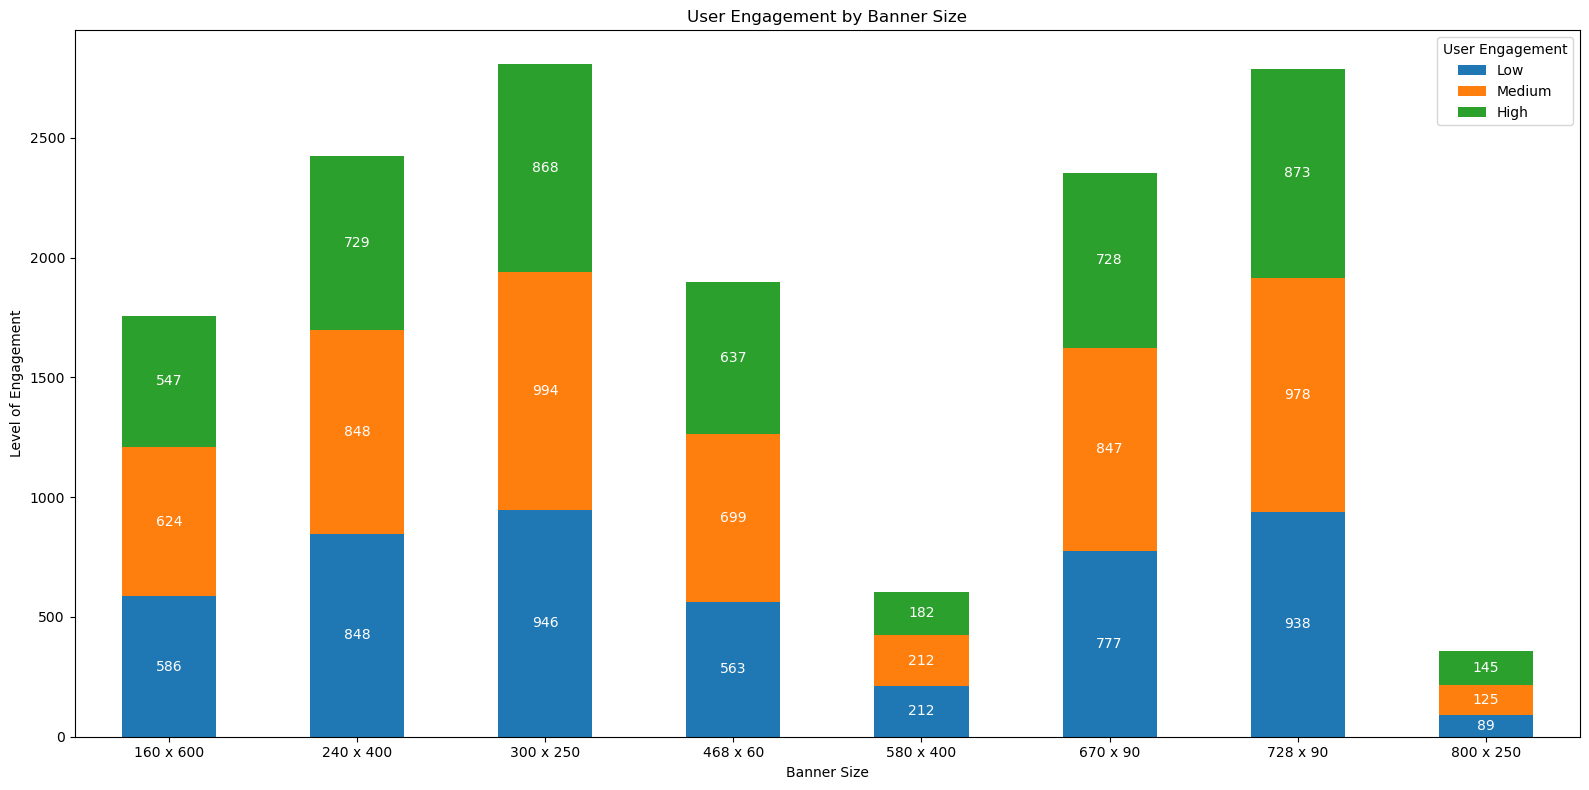

In [139]:
#Creating a visualization of user-engagement vs banner size
user_engagement_banner = df.groupby(['banner_original','user_engagement']).size().unstack()

fig,ax = plt.subplots(figsize=(16,8))
bars = user_engagement_banner.plot(kind='bar', stacked=True, ax=ax)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{int(height)}',
                ha='center', va='center', fontsize=10, color='white'
            )

ax.set_title('User Engagement by Banner Size')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Banner Size')
ax.set_xticklabels(user_engagement_banner.index, rotation=0)

ax.legend(
    labels = ['Low', 'Medium', 'High'],
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper right'
)

plt.tight_layout()
plt.show()


### Performance Rankings
- **Top Performer:** **300×250** banner led with **2,808 total engagements** (946 Low + 994 Medium + 868 High) — the most effective format overall.
- **Runner-Up:** **728×90** closely followed with **2,789 engagements** (938 Low + 978 Medium + 873 High).
- **Third Place:** **240×400** logged **2,425 engagements**, excelling particularly in **medium-level engagement** (848).

### Engagement Distribution Patterns
- **Balanced Top Formats:** The best-performing banners (300×250, 728×90) showed **consistent engagement across all levels**.
- **Medium Engagement Dominance:** Most sizes skewed towards **medium-level engagement**, suggesting stronger interest than casual views, but not always deep interaction.
- **Underperformers:** **580×400** (606 engagements) and **800×250** (359 engagements) demonstrated **consistently poor performance** across all engagement tiers.

### Critical Analysis
- **Size ≠ Success:** Larger banners like **800×250** don’t correlate with higher engagement — in fact, they underperform.
- **Standard Formats Win:** Industry-favorite dimensions like **300×250** and **728×90** benefit from **optimal ad placements and user familiarity**.
- **Quality Engagement Steady:** High engagement numbers ranged from **145 to 873** across formats, indicating **consistent user interest** when banners resonate.

### Strategic Recommendations
1. **Prioritize Investment:** Direct **60–70% of your banner budget** to the high-ROI formats: **300×250** and **728×90**.
2. **Cut Underperformers:** Discontinue banners like **580×400** and **800×250**, which deliver **just ~10–15%** of the engagement seen in top formats.
3. **Support Formats:** Retain **240×400** and **670×90** as secondary options to diversify inventory without hurting performance.
4. **Test Creatives:** Run **A/B tests** within top-performing formats to push **high engagement conversions** from **~30% to 40%+**.

### Key Insight
Standard banner sizes like **300×250** and **728×90** outperform oversized alternatives by **7–8×**, confirming that **familiarity and unobtrusiveness drive stronger user response**.


## Which placement types result in the highest post-click conversion rates?

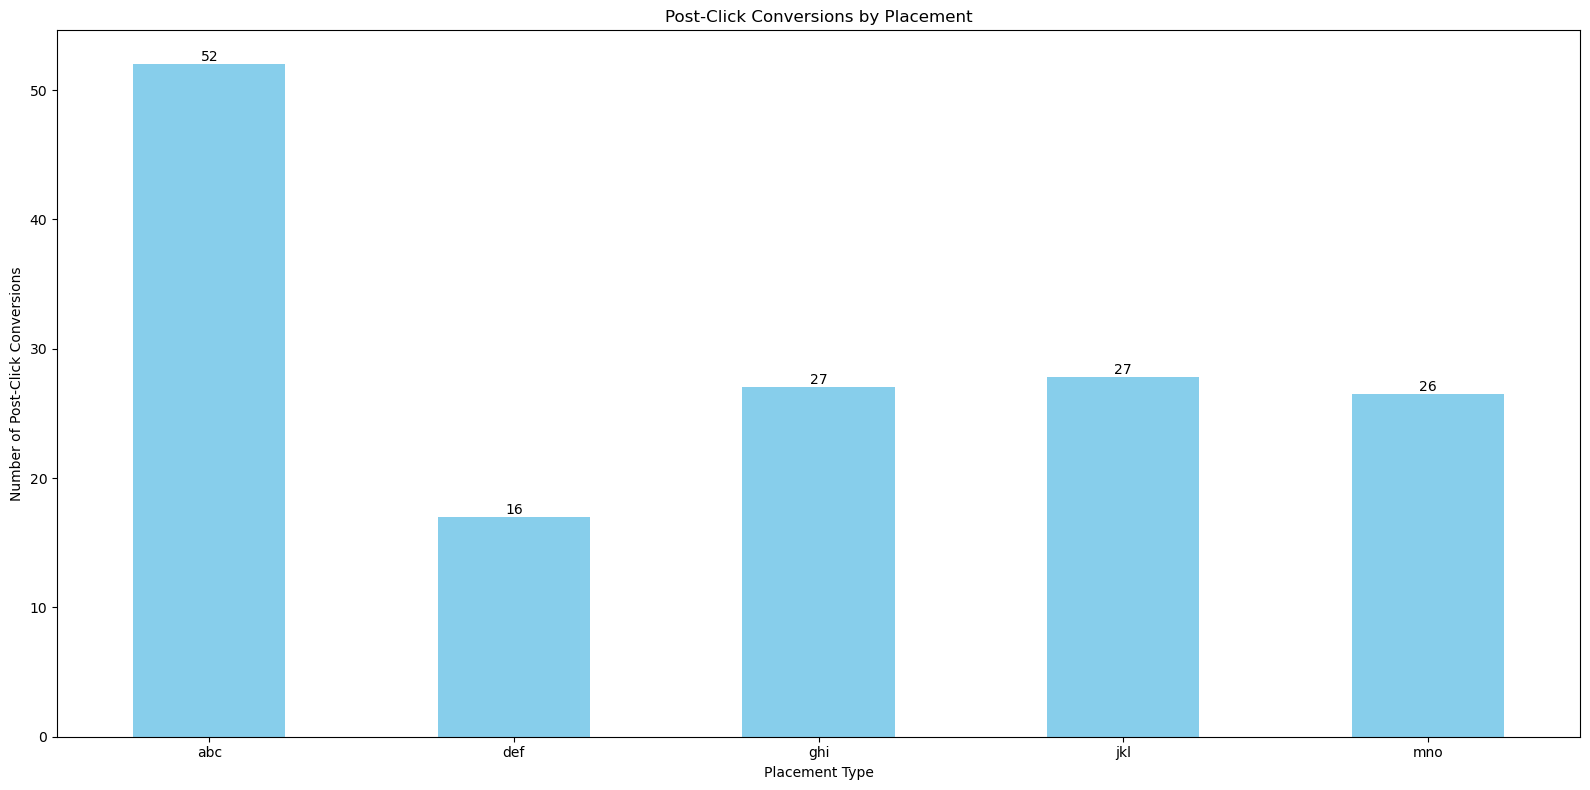

In [140]:
#Creating a visualization of post-click conversion rates by placement
conversion_data = df.groupby('placement_original')[['post_click_conversions', 'clicks']].sum()
conversion_data['conversion_rate'] = (conversion_data['post_click_conversions'] / conversion_data['clicks']) * 100

fig, ax = plt.subplots(figsize=(16, 8))
conversion_data['conversion_rate'].plot(kind='bar', ax=ax, color='skyblue')
bars = ax.patches

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Post-Click Conversions by Placement')
ax.set_ylabel('Number of Post-Click Conversions')
ax.set_xlabel('Placement Type')
ax.set_xticks(range(len(conversion_data)))
ax.set_xticklabels(conversion_data.index, rotation=0)

plt.tight_layout()
plt.show()

Based on the visualization of post-click conversions:

- **`abc`** placement type recorded the **highest** number of post-click conversions with **52 conversions**.
- This significantly outperformed the other placements:
  - `ghi` and `jkl`: 27 conversions each  
  - `mno`: 26 conversions  
  - `def`: 16 conversions


## Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

           displays
count  9.100000e+01
mean   2.626534e+06
std    1.390143e+06
min    8.328390e+05
25%    1.407430e+06
50%    2.192514e+06
75%    3.609850e+06
max    6.531564e+06


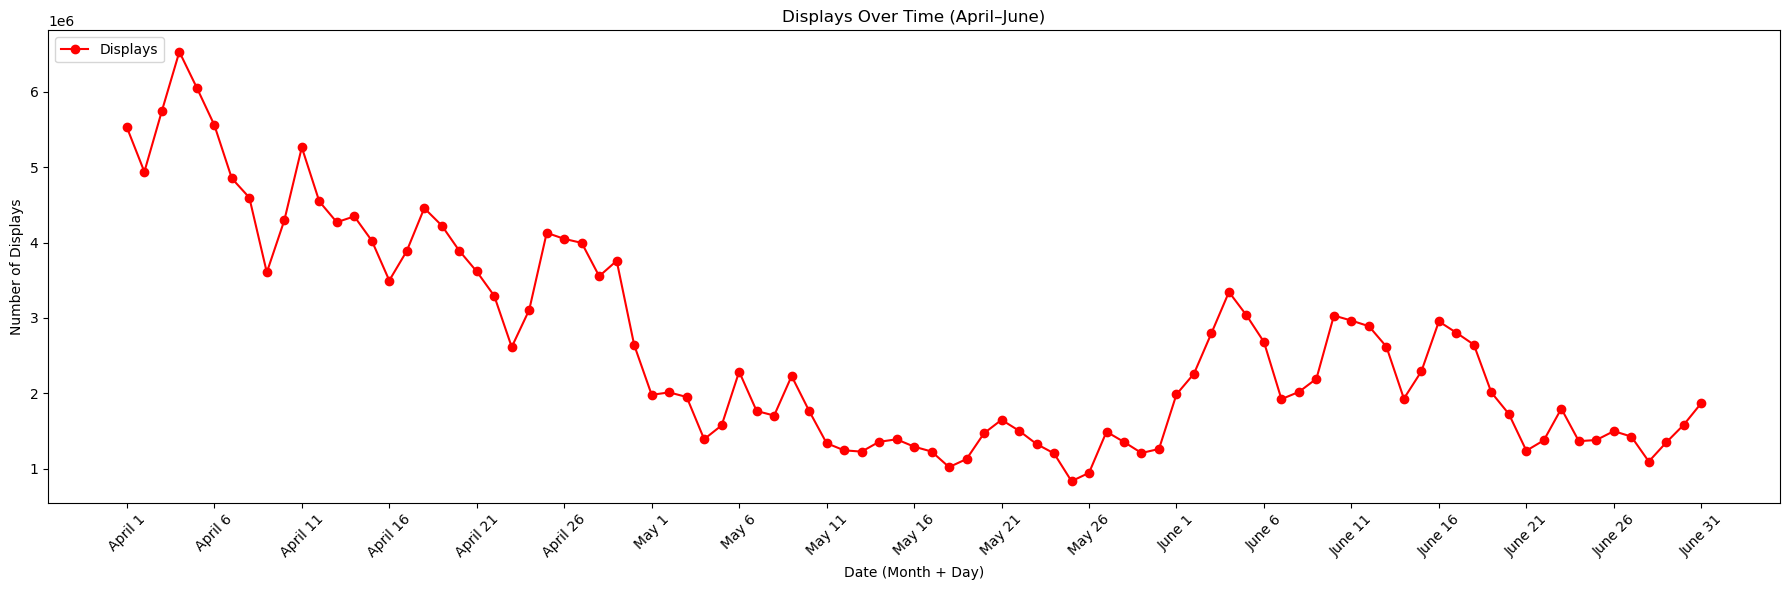

In [141]:
#Creating a visualization of displays overtime
overtime_displays = df.groupby('month_day')['displays'].sum()

sort_key = overtime_displays.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

overtime_displays = overtime_displays.to_frame()
overtime_displays['sort_key'] = sort_key

overtime_displays = overtime_displays.sort_values('sort_key').drop(columns='sort_key')

print(overtime_displays.describe())

fig,ax = plt.subplots(figsize=(18, 6))

overtime_displays.plot(kind='line', marker='o', ax=ax, color='red')

ax.set_title('Displays Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Displays')
ax.set_xticks(range(0, len(overtime_displays), 5))
ax.set_xticklabels(overtime_displays.index[::5], rotation=45)

ax.legend(['Displays'], loc='upper left')

plt.tight_layout()
plt.show()

### Early April Peak
- The number of ad displays began at a **high level** in early April.
- The **peak was observed around April 5**, reaching approximately **6.53 million displays** — the highest in the campaign period.

### Steady Decline Through April and May
- After April 5, there is a **consistent downward trend** in display volume.
- **April 6 to May 20** shows a gradual decrease, indicating a **steady decline in ad visibility**.
- Mid-May records the **lowest display counts**, reaching as low as **832,830** — nearly **68% below the early April peak**.

### Fluctuating Recovery in June
- June starts with **moderate recovery** in displays, though the volume remains significantly below April’s peak.
- **Intermittent fluctuations** appear throughout June, with multiple **short spikes** but no strong upward trend.
- Daily displays range between **1.1 million to 2.7 million**, indicating **increased volatility**.

### Summary Statistics
- **Mean displays per day:** ~2.63 million  
- **Median (50th percentile):** ~2.19 million  
- **Standard deviation:** ~1.39 million (high variability)  
- **Range:** 832,830 (min) to 6.53 million (max)

### Recommendations
- Investigate causes for the **sharp decline post-April 5** (e.g., budget changes, platform restrictions).
- Implement **sustained promotion efforts** in late-April and May to avoid steep drop-offs.
- Use **performance-based scheduling** to optimize display timings during high-visibility windows.


             clicks
count     91.000000
mean   27393.758242
std    21346.525509
min     5214.000000
25%    10935.000000
50%    16385.000000
75%    47153.500000
max    84224.000000


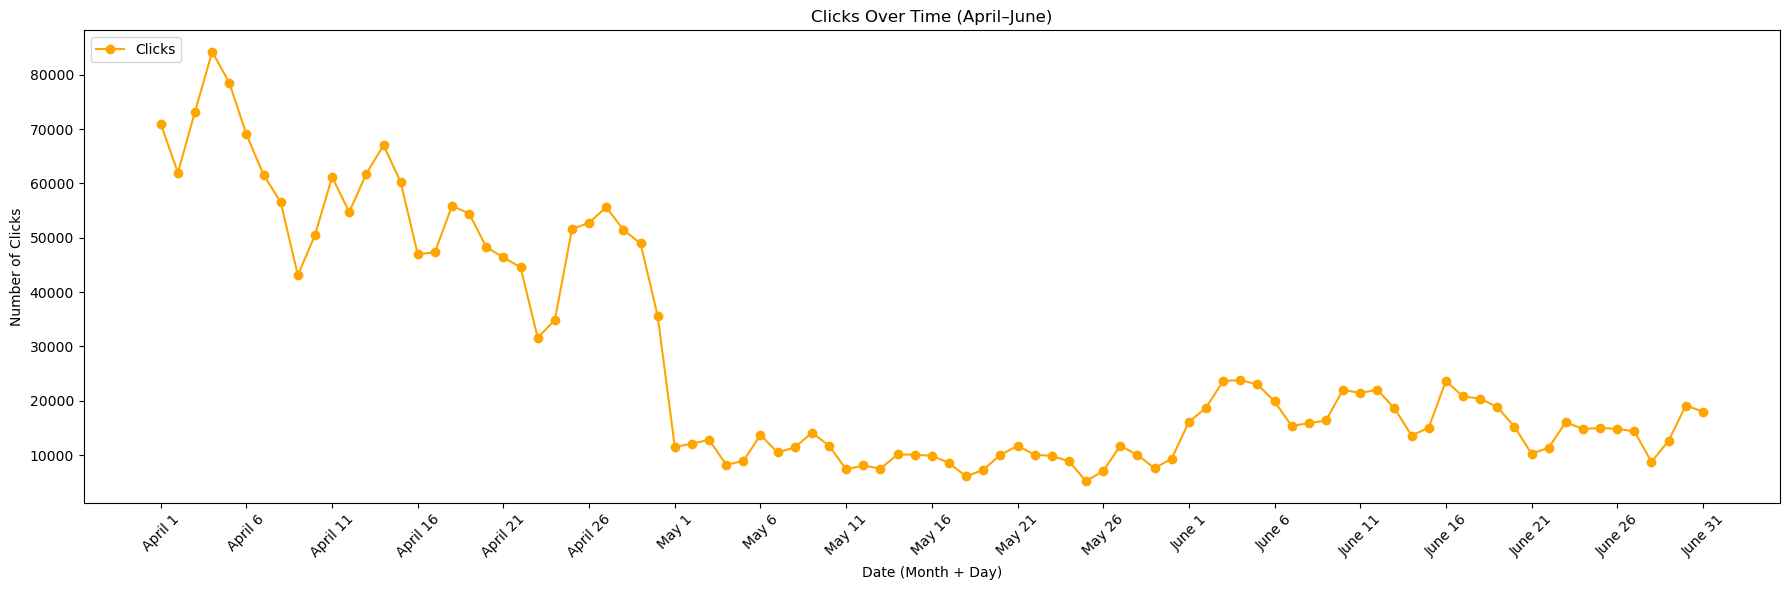

In [142]:
#Creating a visualization of clicks overtime
overtime_clicks = df.groupby('month_day')['clicks'].sum()
sort_key = overtime_clicks.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

overtime_clicks = overtime_clicks.to_frame()
overtime_clicks['sort_key'] = sort_key

overtime_clicks = overtime_clicks.sort_values('sort_key').drop(columns='sort_key')

print(overtime_clicks.describe())

fig, ax = plt.subplots(figsize=(18, 6))
overtime_clicks.plot(kind='line', marker='o', ax=ax, color='orange')

ax.set_title('Clicks Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Clicks')
ax.set_xticks(range(0, len(overtime_clicks), 5))
ax.set_xticklabels(overtime_clicks.index[::5], rotation=45)

ax.legend(['Clicks'], loc='upper left')

plt.tight_layout()
plt.show()

### Gradual Decline in April
- After the initial surge, click volume began a **gradual decline** through mid-to-late April.
- Clicks dropped to approximately **35,000–45,000** by the third week of April, though some **short-term spikes** were visible during this time.

### Steep Drop in Early May
- A sharp and noticeable **drop in clicks occurred at the start of May**.
- Click counts fell below **15,000** for most days in May, indicating a **significant decrease in user interaction** with ads.

### Stabilization in June
- June displayed **low but more stable click volumes**, ranging between **5,200 (min) and 26,000 clicks**.
- Although no major spikes occurred, the click pattern suggests a **controlled recovery** with consistent albeit reduced performance.

### Summary Statistics
- **Mean clicks per day:** ~27,394  
- **Median (50th percentile):** ~16,385  
- **Standard deviation:** ~21,346 (indicating high variability)  
- **Range:** 5,214 (min) to 84,224 (max)

### Recommendations
- Investigate reasons for the **sharp drop at the start of May**, including campaign settings or external factors.
- Consider **reallocating ad budget or modifying targeting** to improve click engagement.
- Analyze **high-performing April days** for replicable patterns in creative or placement strategy.


## Is there a correlation between user engagement levels and the revenue generated?

In [143]:
print(df[['user_engagement' , 'revenue']].describe())

       user_engagement       revenue
count     14995.000000  14995.000000
mean          1.983328     18.423759
std           0.802816     98.059296
min           1.000000      0.000000
25%           1.000000      0.000000
50%           2.000000      0.542300
75%           3.000000      4.000000
max           3.000000   2096.211600


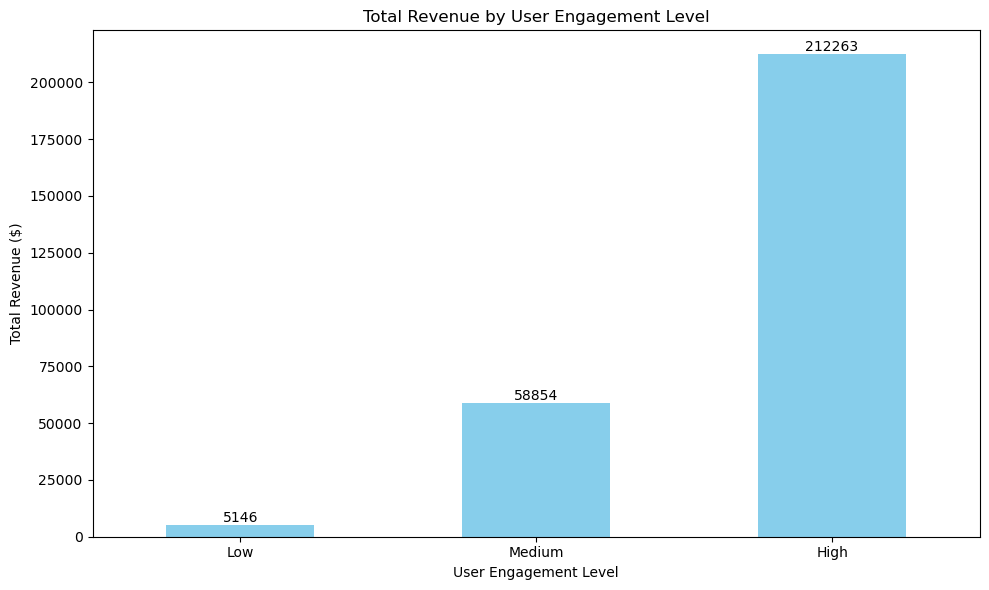

In [144]:
total_revenue_by_user_engagement = df.groupby('user_engagement')['revenue'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
total_revenue_by_user_engagement.plot(kind='bar', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Total Revenue by User Engagement Level')
ax.set_xlabel('User Engagement Level')
ax.set_ylabel('Total Revenue ($)')
ax.set_xticks(range(len(total_revenue_by_user_engagement)))
ax.set_xticklabels(['Low', 'Medium', 'High'], rotation=0)

plt.tight_layout()
plt.show()

In [145]:
#Using Pearson correlation to find the correlation between user engagement and revenue
df_corr = total_revenue_by_user_engagement.reset_index()
df_corr.columns = ['user_engagement', 'total_revenue']

correlation = df_corr['user_engagement'].corr(df_corr['total_revenue'])

print(f"Pearson correlation between user engagement level and total revenue: {correlation:.2f}")

Pearson correlation between user engagement level and total revenue: 0.96


### Analysis

The bar chart displays the **total revenue** generated by users across three engagement levels: **Low**, **Medium**, and **High**.

- Users with **High** engagement levels have contributed the **most significant share of revenue** (over $212,000).
- **Medium** engagement users follow with a moderate contribution (approximately $58,000).
- **Low** engagement users generated the **least revenue**, around $5,000.

To quantify the relationship, we calculated the **Pearson correlation coefficient** between user engagement levels and the total revenue. The result:

**Pearson correlation: 0.96**

### Interpretation

- A correlation coefficient of **0.96** indicates a **very strong positive linear relationship**.
- This means that **as user engagement increases**, the **revenue generated also increases significantly**.
- The trend is **not just visual**, but statistically validated.

### Conclusion

There is a **clear and strong correlation** between user engagement levels and revenue generation. **Improving user engagement** is likely to be a highly effective strategy for increasing revenue.

## Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

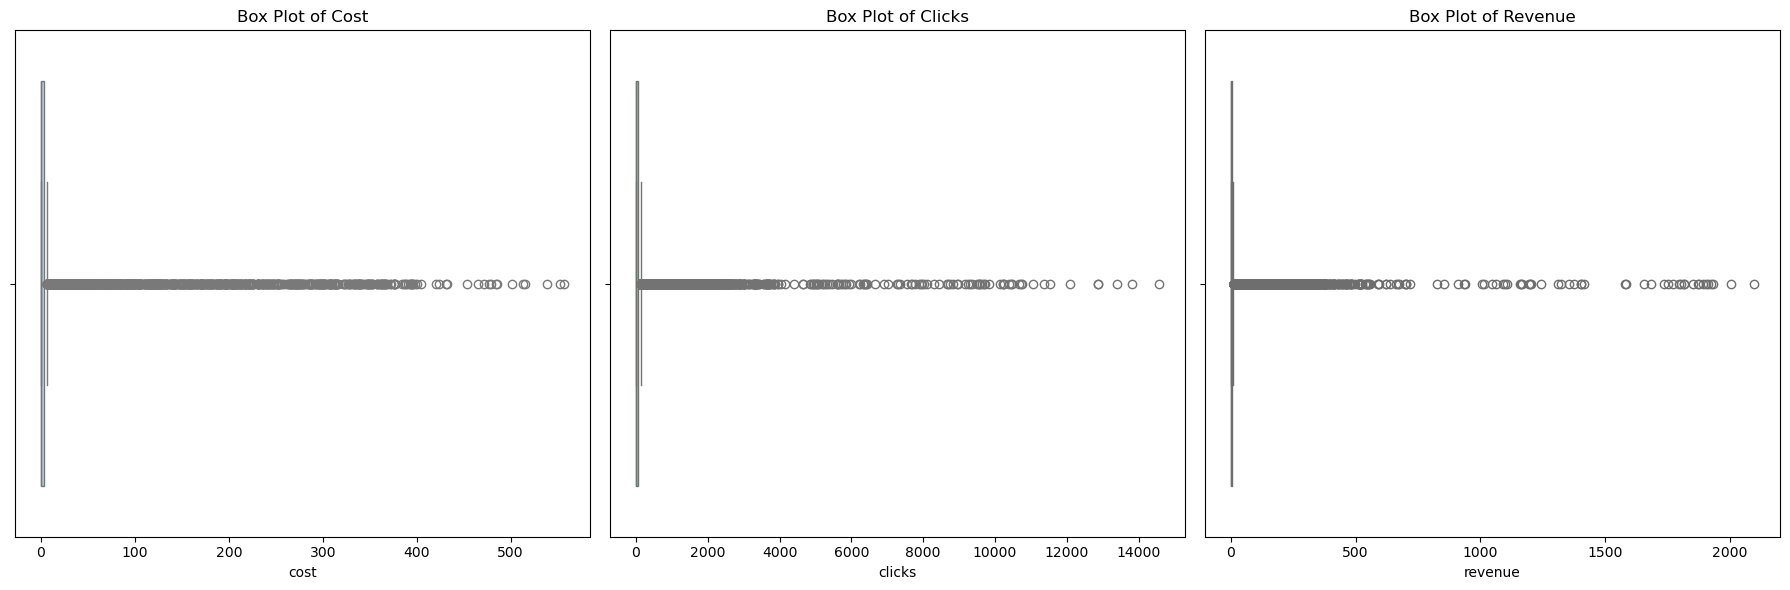

In [146]:
#Creating box plots to identify outliers in cost, clicks, and revenue

fig, axs = plt.subplots(1,3, figsize=(18, 6))

sns.boxplot(x=df['cost'], ax=axs[0], color='lightblue')
axs[0].set_title('Box Plot of Cost')

sns.boxplot(x=df['clicks'], ax=axs[1], color='lightgreen')
axs[1].set_title('Box Plot of Clicks')

sns.boxplot(x=df['revenue'], ax=axs[2], color='lightcoral')
axs[2].set_title('Box Plot of Revenue')

plt.tight_layout()
plt.show()

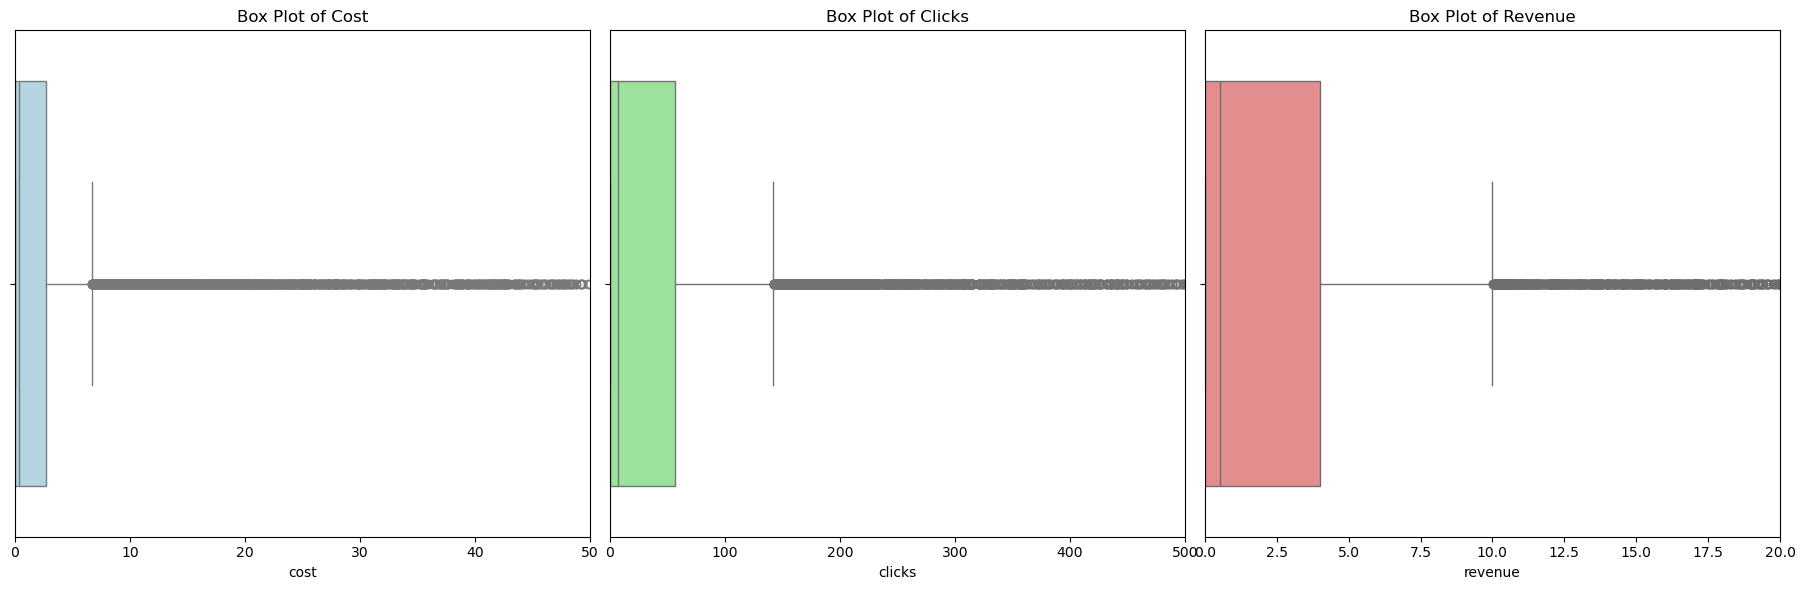

In [147]:
#Zooming in on the box plots to better visualize outliers

fig, axs = plt.subplots(1,3, figsize=(18, 6))

sns.boxplot(x=df['cost'], ax=axs[0], color='lightblue')
axs[0].set_title('Box Plot of Cost')

sns.boxplot(x=df['clicks'], ax=axs[1], color='lightgreen')
axs[1].set_title('Box Plot of Clicks')

sns.boxplot(x=df['revenue'], ax=axs[2], color='lightcoral')
axs[2].set_title('Box Plot of Revenue')

plt.tight_layout()


axs[0].set_xlim(0,50)
axs[1].set_xlim(0,500)
axs[2].set_xlim(0,20)

plt.show()

In [148]:
#Extracting the outliers from the cost, clicks and revenue columns

def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

cost_outliers = find_outliers('cost')
clicks_outliers = find_outliers('clicks')
revenue_outliers = find_outliers('revenue')

print(f"Number of cost outliers: {len(cost_outliers)}")
print(f"Number of clicks outliers: {len(clicks_outliers)}") 
print(f"Number of revenue outliers: {len(revenue_outliers)}")

Number of cost outliers: 2427
Number of clicks outliers: 2208
Number of revenue outliers: 2456


### Cost Outliers

- **Total Campaigns Affected**: 2,427 campaigns  
- **Presence**:  
  Multiple high-cost outliers are visible above the upper whisker.

- **Impact**:  
  These high-cost campaigns may be driving up overall advertising spend without proportional returns.

- **Implications**:  
  Indicates potential budget allocation inefficiencies or premium placement strategies.  
  Requires immediate investigation for cost optimization opportunities.

### Clicks Outliers

- **Total Campaigns Affected**: 2,208 campaigns  
- **Presence**:  
  Numerous outliers exist on the high end, with some campaigns generating significantly more clicks than the typical range.

- **Significance**:  
  High-click outliers could indicate viral content, optimal targeting, or seasonal spikes.

- **Implications**:  
  Represents potential success patterns for replication across other campaigns.

### Revenue Outliers

- **Total Campaigns Affected**: 2,456 campaigns  
- **Presence**:  
  Several high-revenue outliers are visible above the upper whisker.

- **Potential**:  
  These outliers represent either highly successful campaigns or data anomalies requiring validation.

- **Implications**:  
  Strong correlation with cost outliers suggests either high-investment/high-return strategies or inefficient spending.  
  Critical for identifying top-performing campaign characteristics.


## How does the effectiveness of campaigns vary based on the size of the ad and placement type?

Campaign effectiveness can be assessed using multiple performance metrics, depending on the objective:

### **Revenue-Based Metrics**
- **Revenue per Click** and **Total Revenue** help evaluate financial returns.

### **Conversion-Based Metrics**
- **Post-Click Conversion Rate** assesses the efficiency in turning clicks into actions.

### **Engagement-Based Metrics**
- **Click-Through Rate (CTR)** is a reliable indicator of how appealing an ad is to users.

### Why CTR?

While revenue and conversion rates have already been analyzed, this section focuses on **CTR (Click-Through Rate)** to evaluate **user engagement and creative performance**. CTR measures how effective an ad is at capturing attention and generating interest.

A higher CTR indicates a more engaging and relevant ad.

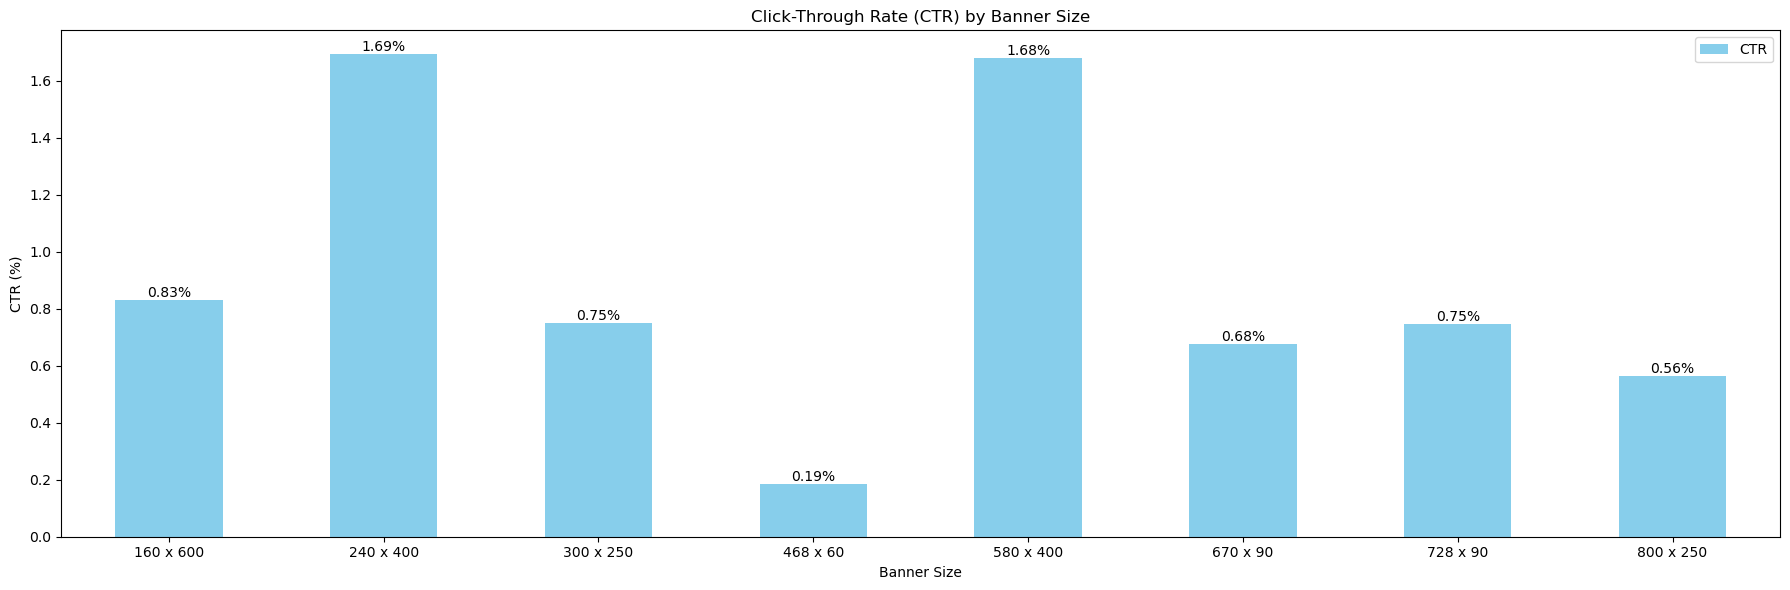

In [149]:
#Creaint a visualization of click-through rate (CTR) by banner size across all campaigns

ctr_banner = df.groupby('banner_original')[['clicks', 'displays']].sum().reset_index()
ctr_banner['CTR'] = (ctr_banner['clicks'] / ctr_banner['displays']) * 100

#Creating a plot for CTR by banner size
fig, axs = plt.subplots(figsize=(18, 6))
ctr_banner.plot(kind='bar', x='banner_original', y='CTR', ax=axs, color='skyblue')
for bar in axs.patches:
    height = bar.get_height()
    axs.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}%', 
        ha='center', va='bottom', fontsize=10
    )

axs.set_title('Click-Through Rate (CTR) by Banner Size')
axs.set_xlabel('Banner Size')
axs.set_ylabel('CTR (%)')
axs.set_xticklabels(ctr_banner['banner_original'], rotation=0)
axs.legend(['CTR'], loc='upper right')

plt.tight_layout()
plt.show()

### Top Performing Banner Sizes
- **240 x 400** — 1.69% CTR *(highest)*
- **580 x 400** — 1.68% CTR
- **160 x 600** — 0.83% CTR

### Poor Performing Banner Sizes
- **468 x 60** — 0.19% CTR *(lowest)*
- **800 x 250** — 0.56% CTR
- **670 x 90** — 0.68% CTR

### Medium Performance
- **300 x 250** — 0.75% CTR
- **728 x 90** — 0.75% CTR

### Key Insights
- **Vertical banners outperform**: Tall formats like 240x400 and 580x400 have the highest CTRs.
- **Banner blindness**: 468x60 format has very low engagement, likely due to user desensitization.
- **Skyscraper format is reliable**: 160x600 performs well across campaigns.
- **Medium rectangle (300x250)** provides average performance.
- **Leaderboard results vary**: 728x90 performs reasonably, while 800x250 lags behind.
- **Horizontal formats underperform**: Smaller wide banners like 670x90 show weaker results.

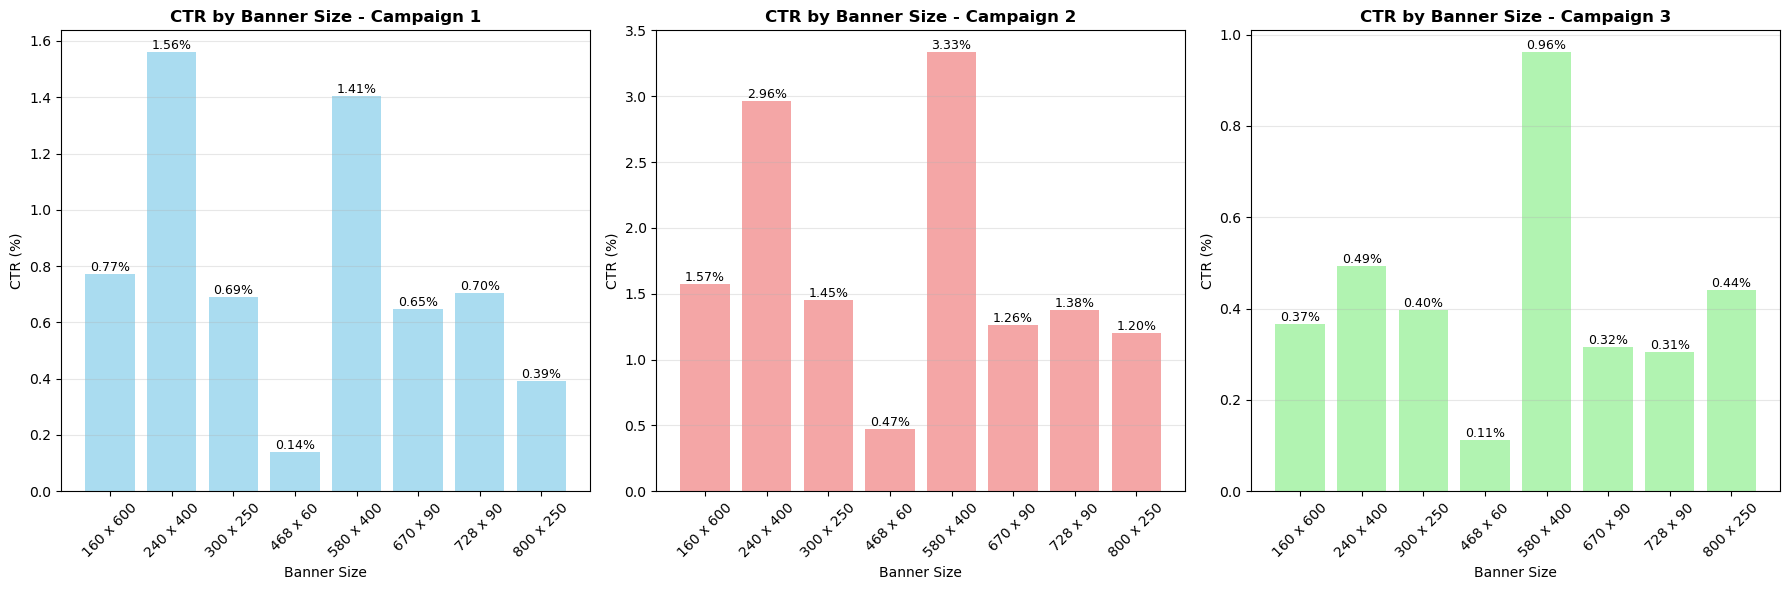

In [150]:
#Creating a visualization of CTR by banner size, individually for each campaign

ctr_by_campaign_banner = df.groupby(['campaign_number', 'banner_original'])[['clicks', 'displays']].sum().reset_index()
ctr_by_campaign_banner['CTR'] = (ctr_by_campaign_banner['clicks'] / ctr_by_campaign_banner['displays']) * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
campaigns = [1, 2, 3]
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, campaign in enumerate(campaigns):
    campaign_data = ctr_by_campaign_banner[ctr_by_campaign_banner['campaign_number'] == campaign]
    
    bars = axes[i].bar(campaign_data['banner_original'], campaign_data['CTR'], color=colors[i], alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)
    
    axes[i].set_title(f'CTR by Banner Size - Campaign {campaign}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Banner Size')
    axes[i].set_ylabel('CTR (%)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Campaign 1**
- **CTR Range:** 0.14% - 1.56%
- **Top Performer:** 240x400 (1.56%)
- **Worst Performer:** 468x60 (0.14%)
- **Spread:** 11.1× difference

### **Campaign 2**
- **CTR Range:** 0.47% - 3.33%
- **Top Performer:** 580x400 (3.33%)
- **Worst Performer:** 468x60 (0.47%)
- **Spread:** 7.1× difference

### **Campaign 3**
- **CTR Range:** 0.11% - 0.96%
- **Top Performer:** 580x400 (0.96%)
- **Worst Performer:** 468x60 (0.11%)
- **Spread:** 8.7× difference

### High-Performance Banner Sizes
- **240x400:** Strong across all campaigns (1.56%, 2.96%, 0.49%)
- **580x400:** Top in Campaign 2 (3.33%), good elsewhere (1.41%, 0.96%)
- **160x600:** Steady mid-tier (0.71%, 1.57%, 0.37%)

### Poor-Performance Banner Sizes
- **468x60:** Worst overall (0.14%, 0.47%, 0.11%)
- **670x90:** Low CTRs in all campaigns (0.65%, 1.26%, 0.32%)
- **728x90:** Poor to moderate (0.70%, 1.38%, 0.31%)

### Variable Performance Banner Sizes
- **300x250:** Campaign dependent (0.69%, 1.45%, 0.40%)
- **800x250:** Moderate and inconsistent (0.39%, 1.20%, 0.44%)

### **Campaign 1 (Baseline Performance)**
- Middle-ground performance.
- Follows standard performance trends with format sensitivity.

### **Campaign 2 (Best Performer)**
- Achieves 2–3× higher CTRs across formats.
- Vertical banners like 240x400 and 580x400 perform exceptionally.
- Even underperformers like 468x60 do relatively better.

### **Campaign 3 (Weakest Performer)**
- Lowest CTRs across all sizes.
- Max CTR is only 0.96% — potential issues with targeting/content.
- Performance gap is significant vs. other campaigns.


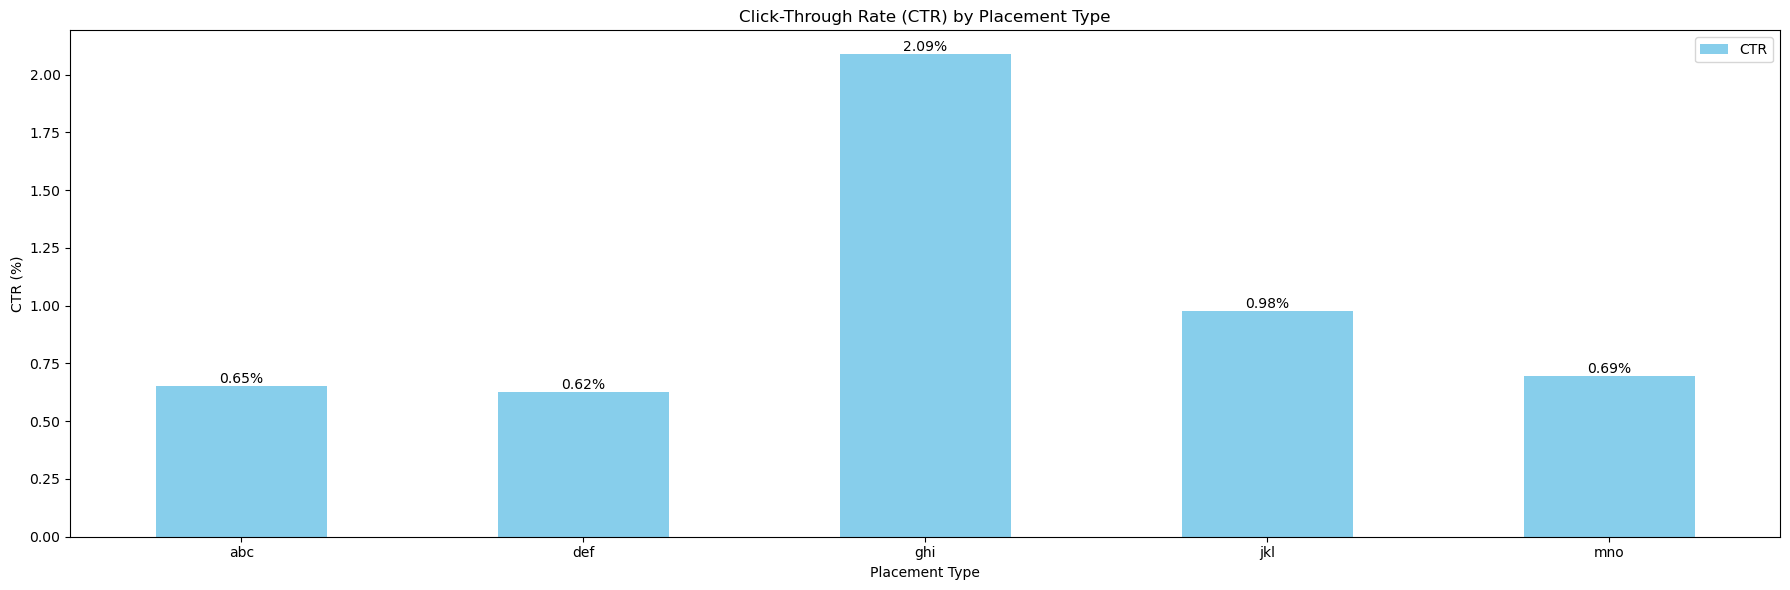

In [151]:
#Creating a visualization of CTR by placement type across all campaigns

ctr_placement = df.groupby('placement_original')[['clicks', 'displays']].sum().reset_index()
ctr_placement['CTR'] = (ctr_placement['clicks'] / ctr_placement['displays']) * 100

#Creating a plot for CTR by placement type
fig, axs = plt.subplots(figsize=(18, 6))
ctr_placement.plot(kind='bar', x='placement_original', y='CTR', ax=axs, color='skyblue')
for bar in axs.patches:
    height = bar.get_height()
    axs.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}%', 
        ha='center', va='bottom', fontsize=10
    )

axs.set_title('Click-Through Rate (CTR) by Placement Type')
axs.set_xlabel('Placement Type')
axs.set_ylabel('CTR (%)')
axs.set_xticklabels(ctr_placement['placement_original'], rotation=0)
axs.legend(['CTR'], loc='upper right')

plt.tight_layout()
plt.show()

### High-Performance Placements
- **ghi**: **2.09% CTR** *(top performer)*
- **jkl**: **0.98% CTR** *(second tier)*

### Moderate-Performance Placements
- **mno**: **0.69% CTR**
- **abc**: **0.65% CTR**
- **def**: **0.62% CTR** *(lowest performer)*

### Exceptional Performance Gap
The **"ghi"** placement achieves a **2.09% CTR**, representing a **3.4× performance advantage** over the lowest-performing placement **"def" (0.62%)**. This dramatic difference suggests significant variations in **placement quality, visibility, or user engagement context**.

### Performance Clustering
The data reveals two distinct performance clusters:

- **High-impact cluster**: `ghi (2.09%)` and `jkl (0.98%)` – *premium placements*
- **Standard cluster**: `abc, def, mno (0.62% – 0.69%)` – *baseline placements with minimal variation*


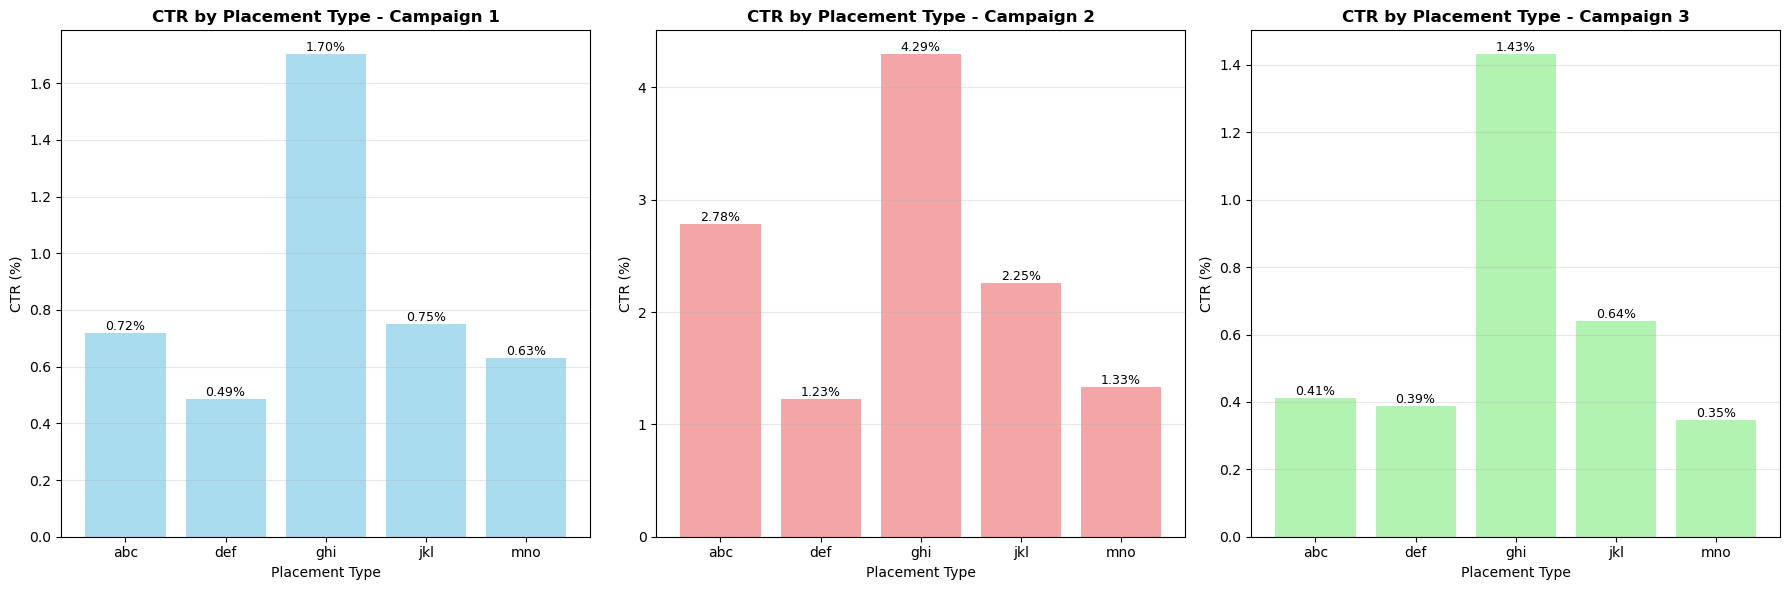

In [152]:
#Creating a visualization of CTR by placement type, individually for each campaign

ctr_by_campaign_placement = df.groupby(['campaign_number', 'placement_original'])[['clicks', 'displays']].sum().reset_index()
ctr_by_campaign_placement['CTR'] = (ctr_by_campaign_placement['clicks'] / ctr_by_campaign_placement['displays']) * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
campaigns = [1, 2, 3]
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, campaign in enumerate(campaigns):
    campaign_data = ctr_by_campaign_placement[ctr_by_campaign_placement['campaign_number'] == campaign]
    
    bars = axes[i].bar(campaign_data['placement_original'], campaign_data['CTR'], color=colors[i], alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=9)
    
    axes[i].set_title(f'CTR by Placement Type - Campaign {campaign}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Placement Type')
    axes[i].set_ylabel('CTR (%)')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **Campaign 1**

- **CTR Range:** 0.49% - 1.70%  
- **Top Performer:** `ghi` (1.70% CTR)  
- **Worst Performer:** `def` (0.49% CTR)  
- **Performance Spread:** 3.5x difference  

### **Campaign 2**

- **CTR Range:** 1.23% - 4.29%  
- **Top Performer:** `ghi` (4.29% CTR)  
- **Worst Performer:** `def` (1.23% CTR)  
- **Performance Spread:** 3.5x difference  

### **Campaign 3**

- **CTR Range:** 0.35% - 1.43%  
- **Top Performer:** `ghi` (1.43% CTR)  
- **Worst Performer:** `mno` (0.35% CTR)  
- **Performance Spread:** 4.1x difference  

### **Consistent High Performer**

Placement **`ghi`** dominates across all campaigns:

- **Campaign 1:** 1.70% CTR *(2.3x campaign average)*  
- **Campaign 2:** 4.29% CTR *(2.4x campaign average)*  
- **Campaign 3:** 1.43% CTR *(3.6x campaign average)*  

### **Consistent Underperformer**

Placement **`def`** shows poor performance across campaigns:

- **Campaign 1:** 0.49% CTR *(lowest)*  
- **Campaign 2:** 1.23% CTR *(lowest)*  
- **Campaign 3:** 0.39% CTR *(second lowest)*  

### **Variable Performance Placements**

- `abc`: Moderate consistency — 0.72%, 2.78%, 0.41%  
- `jkl`: Moderate to good performance — 0.75%, 2.25%, 0.64%  
- `mno`: Variable results — 0.63%, 1.33%, 0.35%  

### **Campaign 1 - Standard Performance**

- Baseline performance levels with clear placement differentiation  
- Exhibits typical banner ad behavior by placement

### **Campaign 2 - Exceptional Performance**

- Achieves **2-3x higher CTRs** than other campaigns across all placements  
- Even the worst-performing placement (**def** at 1.23%) outperforms most placements in other campaigns  
- Peak performance of **4.29%** for placement **"ghi"** indicates exceptional user engagement  

### **Campaign 3 - Moderate Performance**

- Shows consistent moderate performance across most placements  
- Less dramatic gaps between placements  
- Still exhibits clear placement hierarchy with **"ghi"** leading  


## Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

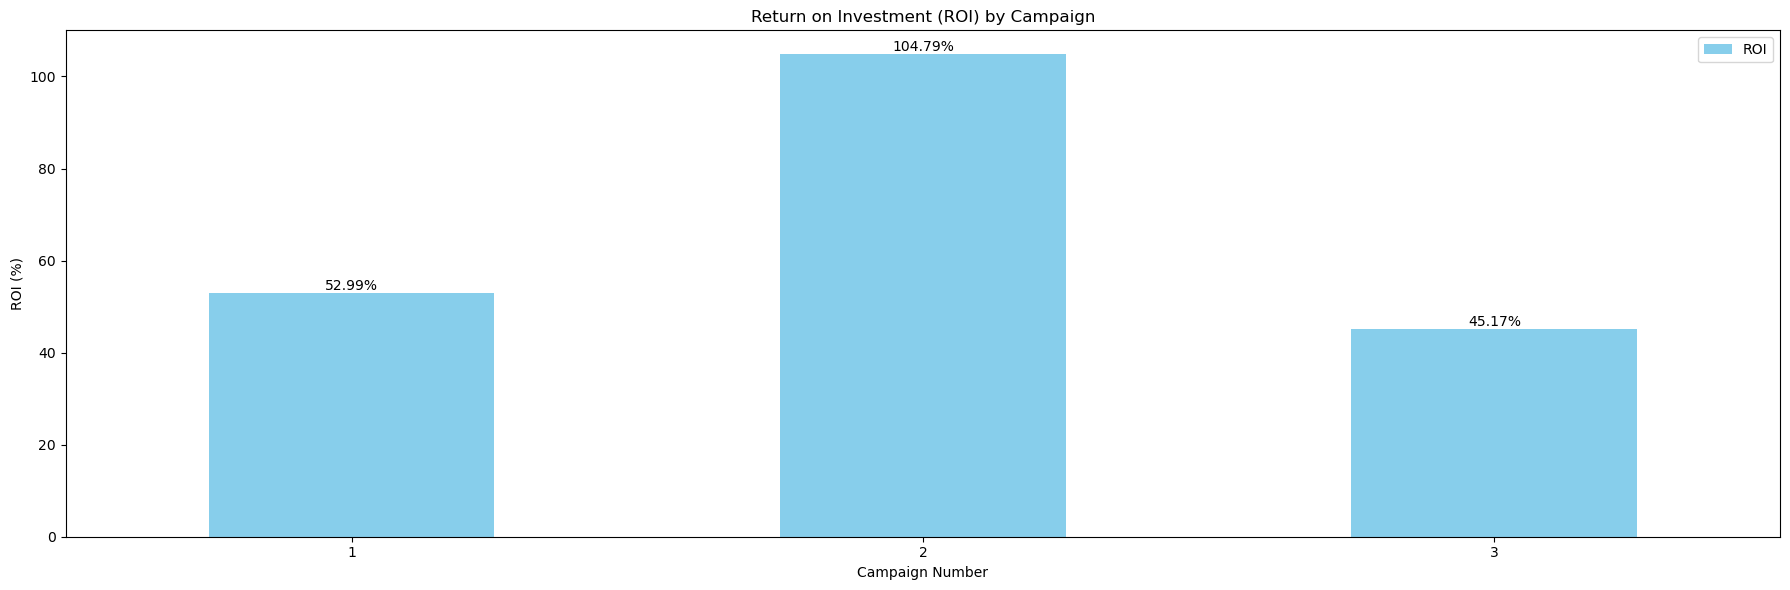

In [153]:
#Creating a visualization of ROI by campaign
campaign_roi = df.groupby('campaign_number')[['revenue', 'cost']].sum().reset_index()
campaign_roi['ROI'] = ((campaign_roi['revenue'] - campaign_roi['cost']) / campaign_roi['cost']) * 100

fig, ax = plt.subplots(figsize=(18, 6))
campaign_roi.plot(kind='bar', x='campaign_number', y='ROI', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}%', 
        ha='center', va='bottom', fontsize=10
    )
ax.set_title('Return on Investment (ROI) by Campaign')
ax.set_xlabel('Campaign Number')
ax.set_ylabel('ROI (%)')
ax.set_xticklabels(campaign_roi['campaign_number'], rotation=0)
ax.legend(['ROI'], loc='upper right')

plt.tight_layout()
plt.show()

### Campaign 1 – Moderate Performance
- **ROI:** 52.99%
- **Performance:** Above break-even with solid returns  
- **Implication:** Every dollar invested generates **$1.53** in return

### Campaign 2 – Exceptional Performance
- **ROI:** 104.79%
- **Performance:** Market-leading returns  
- **Implication:** Every dollar invested generates **$2.05** in return

### Campaign 3 – Underperforming
- **ROI:** 45.17%
- **Performance:** Lowest returns among all campaigns  
- **Implication:** Every dollar invested generates **$1.45** in return

### Exceptional ROI Leader
Campaign 2's **104.79% ROI** represents outstanding performance, achieving returns that are:
- **2.0× higher** than Campaign 1 (52.99%)
- **2.3× higher** than Campaign 3 (45.17%)
- The **only campaign** to exceed **100% ROI**

### Performance Gap Analysis
The **59.64 percentage point** difference between the best (Campaign 2) and worst (Campaign 3) performing campaigns indicates substantial optimization opportunities and highlights the critical importance of campaign execution.

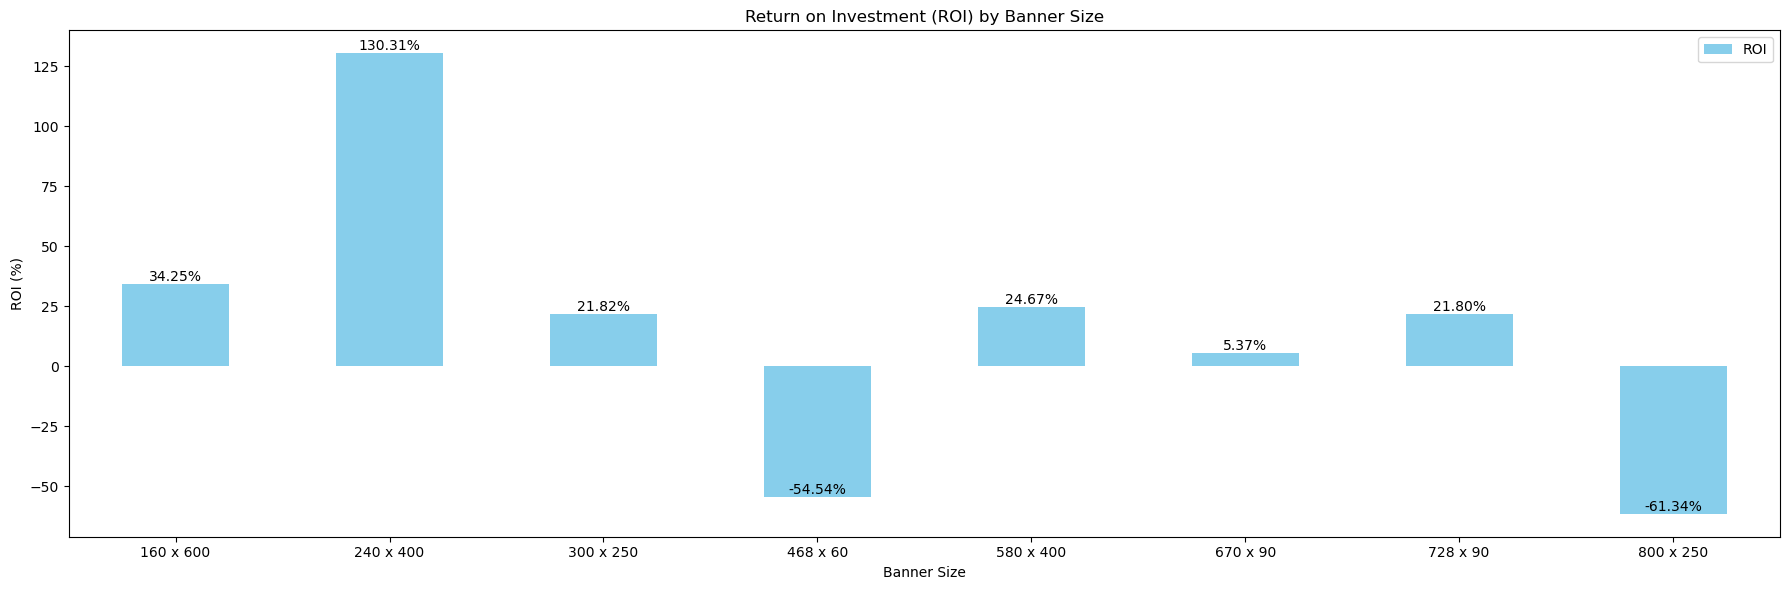

In [154]:
#Creating a visualization of ROI by banner size
banner_roi = df.groupby('banner_original')[['revenue', 'cost']].sum().reset_index()
banner_roi['ROI'] = ((banner_roi['revenue'] - banner_roi['cost']) / banner_roi['cost']) * 100

fig, ax = plt.subplots(figsize=(18, 6))
banner_roi.plot(kind='bar', x='banner_original', y='ROI', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}%', 
        ha='center', va='bottom', fontsize=10
    )
ax.set_title('Return on Investment (ROI) by Banner Size')
ax.set_xlabel('Banner Size')
ax.set_ylabel('ROI (%)')
ax.set_xticklabels(banner_roi['banner_original'], rotation=0)
ax.legend(['ROI'], loc='upper right')

plt.tight_layout()
plt.show()

### Exceptional Performance
- **240x400**: 130.31% ROI *(Top performer)*
- **160x600**: 34.25% ROI *(Second tier)*

### Moderate Performance
- **580x400**: 24.67% ROI  
- **300x250**: 21.82% ROI  
- **728x90**: 21.80% ROI

### Poor Performance
- **670x90**: 5.37% ROI *(Barely profitable)*

### Loss-Making Formats
- **468x60**: -54.54% ROI *(Significant losses)*  
- **800x250**: -61.34% ROI *(Worst performer)*

### Outstanding ROI Leader
The **240x400** banner format achieves a **130.31% ROI**, representing:
- **3.8× higher** returns than the second-best performer (**160x600**)
- **5.3× higher** returns than the moderate performers
- The **only format** to exceed **100% ROI**

### Critical Performance Gap
A **191.65 percentage point** gap exists between the best (**240x400: 130.31%**) and worst (**800x250: -61.34%**) formats, underscoring the strategic impact of banner size.

### Negative ROI Formats
Two banner formats actively lose money:
- **468x60**: Loses **$0.55** for every dollar invested  
- **800x250**: Loses **$0.61** for every dollar invested

## What is the distribution of post-click conversions across different placement types?

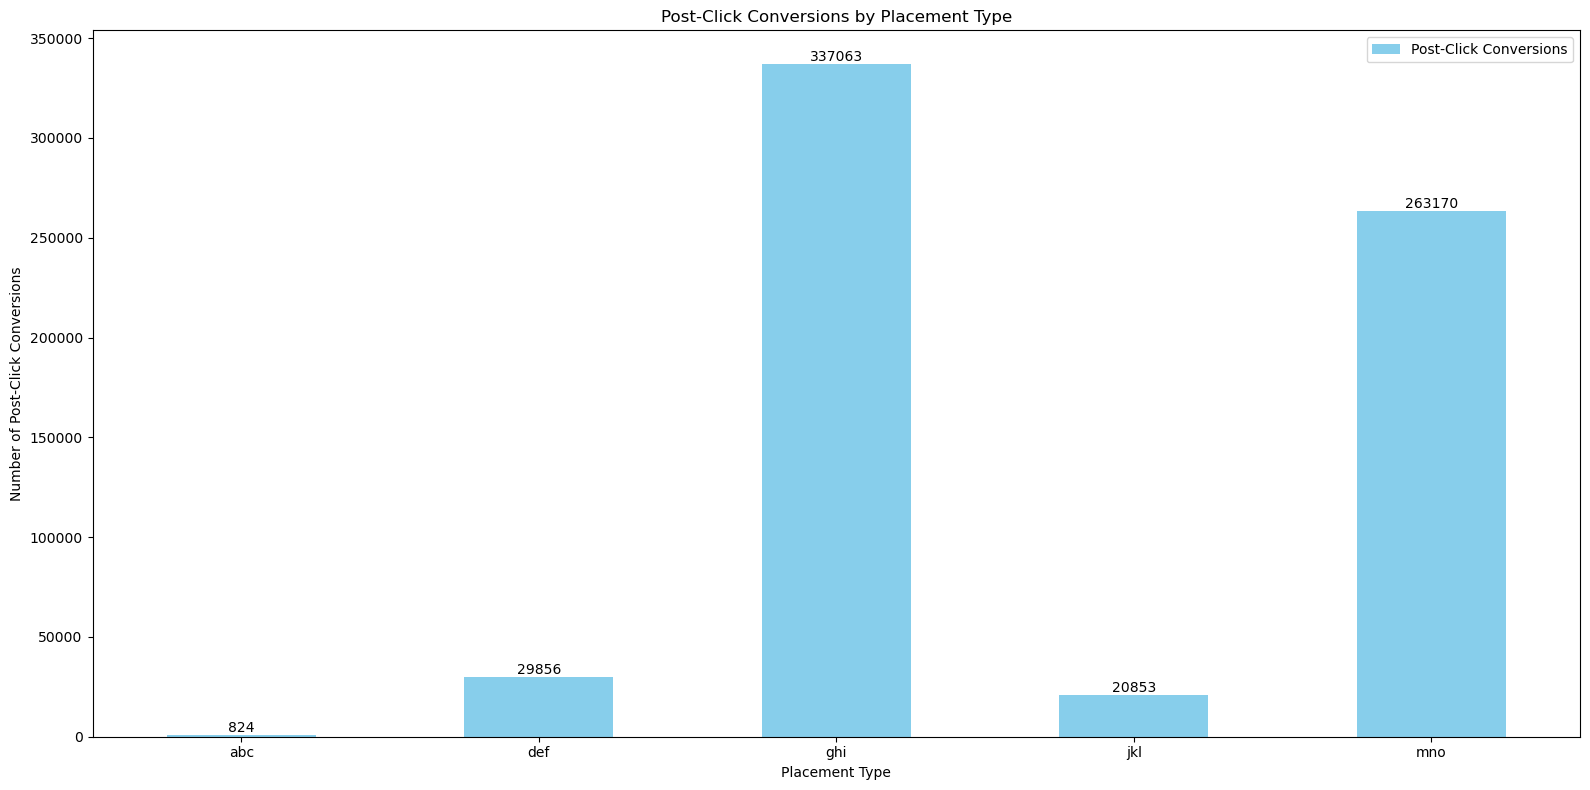

In [155]:
#Creating a visualization of post-click conversions by placement types
post_place = df.groupby('placement_original')['post_click_conversions'].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 8))
post_place.plot(kind='bar', x='placement_original', y='post_click_conversions', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Post-Click Conversions by Placement Type')
ax.set_xlabel('Placement Type')
ax.set_ylabel('Number of Post-Click Conversions')
ax.set_xticklabels(post_place['placement_original'], rotation=0)
ax.legend(['Post-Click Conversions'], loc='upper right')

plt.tight_layout()
plt.show()

### Top Performing Placement Types

**GHI**  
- Post-Click Conversions: 337,063  
- Highest conversion volume, indicating strong user engagement and conversion potential.

**MNO**  
- Post-Click Conversions: 263,170  
- Second-best performer with solid conversion rates and market penetration.

### Moderate Performers

**DEF**  
- Post-Click Conversions: 29,856  
- Reasonable performance but with significant room for improvement compared to top performers.

**JKL**  
- Post-Click Conversions: 20,853  
- Modest conversion activity.

### Underperforming Placement

**ABC**  
- Post-Click Conversions: 824  
- Minimal impact, suggesting this placement type may need strategic review or optimization.

## Are there any noticeable differences in user engagement levels between weekdays and weekends?

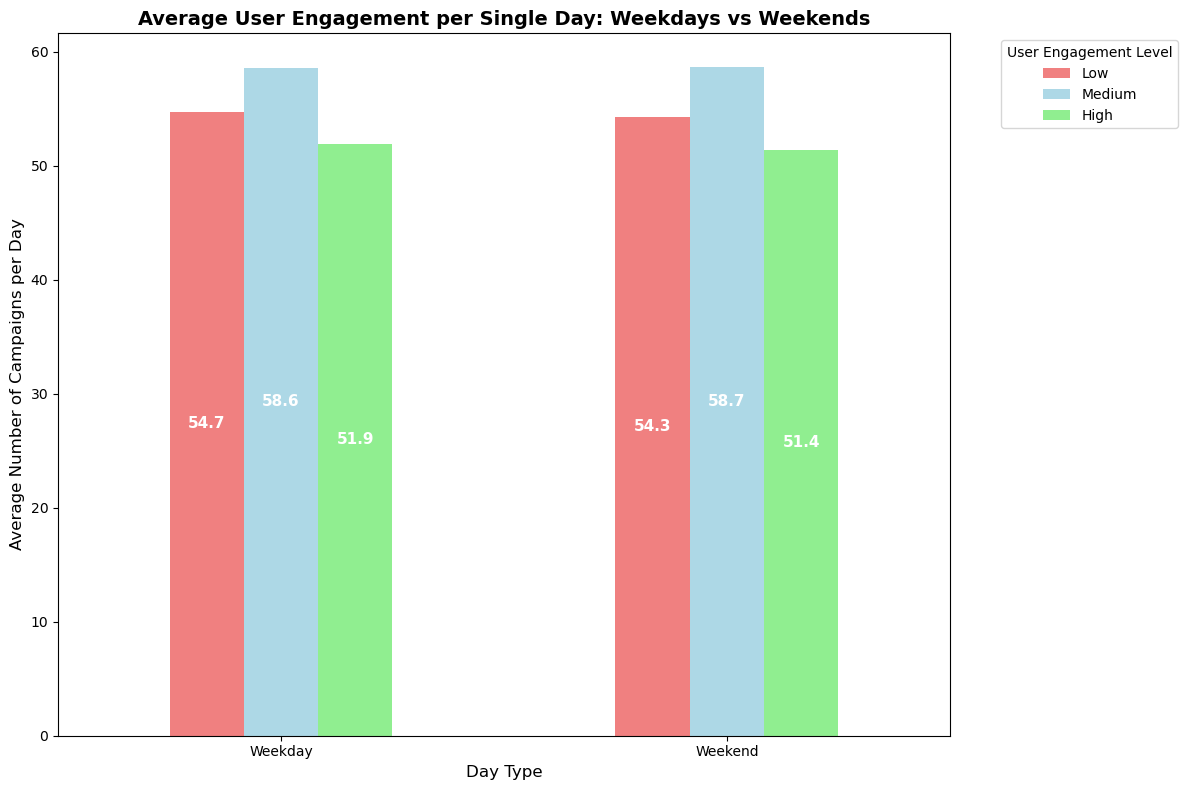

In [156]:
month_map = {'April': 4, 'May': 5, 'June': 6}
df['month'] = df['month_name'].map(month_map)

# Remove rows with invalid dates before creating the datetime column
valid_date_mask = (
    ((df['month'] == 4) & (df['day'] <= 30)) |
    ((df['month'] == 5) & (df['day'] <= 31)) |
    ((df['month'] == 6) & (df['day'] <= 30))
)
df_valid = df[valid_date_mask].copy()

df_valid['date'] = pd.to_datetime(dict(year=2020, month=df_valid['month'], day=df_valid['day']))

df_valid['day_type'] = df_valid['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekday_engagement = df_valid.groupby(['day_type', 'user_engagement']).size().unstack()

# Calculate total campaigns and average per day type
weekday_totals = weekday_engagement.sum(axis=1)

# Count the number of unique weekdays and weekends in the dataset
weekday_count = df_valid[df_valid['day_type'] == 'Weekday']['date'].nunique()
weekend_count = df_valid[df_valid['day_type'] == 'Weekend']['date'].nunique()

# Calculate average campaigns per single weekday/weekend
avg_weekday = weekday_totals['Weekday'] / weekday_count
avg_weekend = weekday_totals['Weekend'] / weekend_count

# Calculate average by engagement level
avg_engagement_by_day_type = weekday_engagement.div([weekday_count, weekend_count], axis=0)

# Create visualization of averaged engagement levels
fig, ax = plt.subplots(figsize=(12, 8))
bars = avg_engagement_by_day_type.plot(kind='bar', ax=ax, color=['lightcoral', 'lightblue', 'lightgreen'])

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{height:.1f}',
                ha='center', va='center', fontsize=11, color='white', fontweight='bold'
            )

ax.set_title('Average User Engagement per Single Day: Weekdays vs Weekends', fontsize=14, fontweight='bold')
ax.set_xlabel('Day Type', fontsize=12)
ax.set_ylabel('Average Number of Campaigns per Day', fontsize=12)
ax.set_xticklabels(['Weekday', 'Weekend'], rotation=0)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement Level',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

###  Minimal Overall Differences
The data reveals remarkably consistent user engagement patterns between weekdays and weekends, with virtually no significant variation in average daily engagement levels.

###  Detailed Breakdown by Engagement Level

#### **Low Engagement Users**
- **Weekdays:** 55.6 campaigns per day  
- **Weekends:** 54.9 campaigns per day  
- **Difference:** −0.7 campaigns (**1.3% decrease** on weekends)

#### **Medium Engagement Users**
- **Weekdays:** 60.4 campaigns per day  
- **Weekends:** 60.5 campaigns per day  
- **Difference:** +0.1 campaigns (**essentially identical**)

#### **High Engagement Users**
- **Weekdays:** 53.8 campaigns per day  
- **Weekends:** 53.3 campaigns per day  
- **Difference:** −0.5 campaigns (**0.9% decrease** on weekends)

## How does the cost per click (CPC) vary across different campaigns and banner sizes?

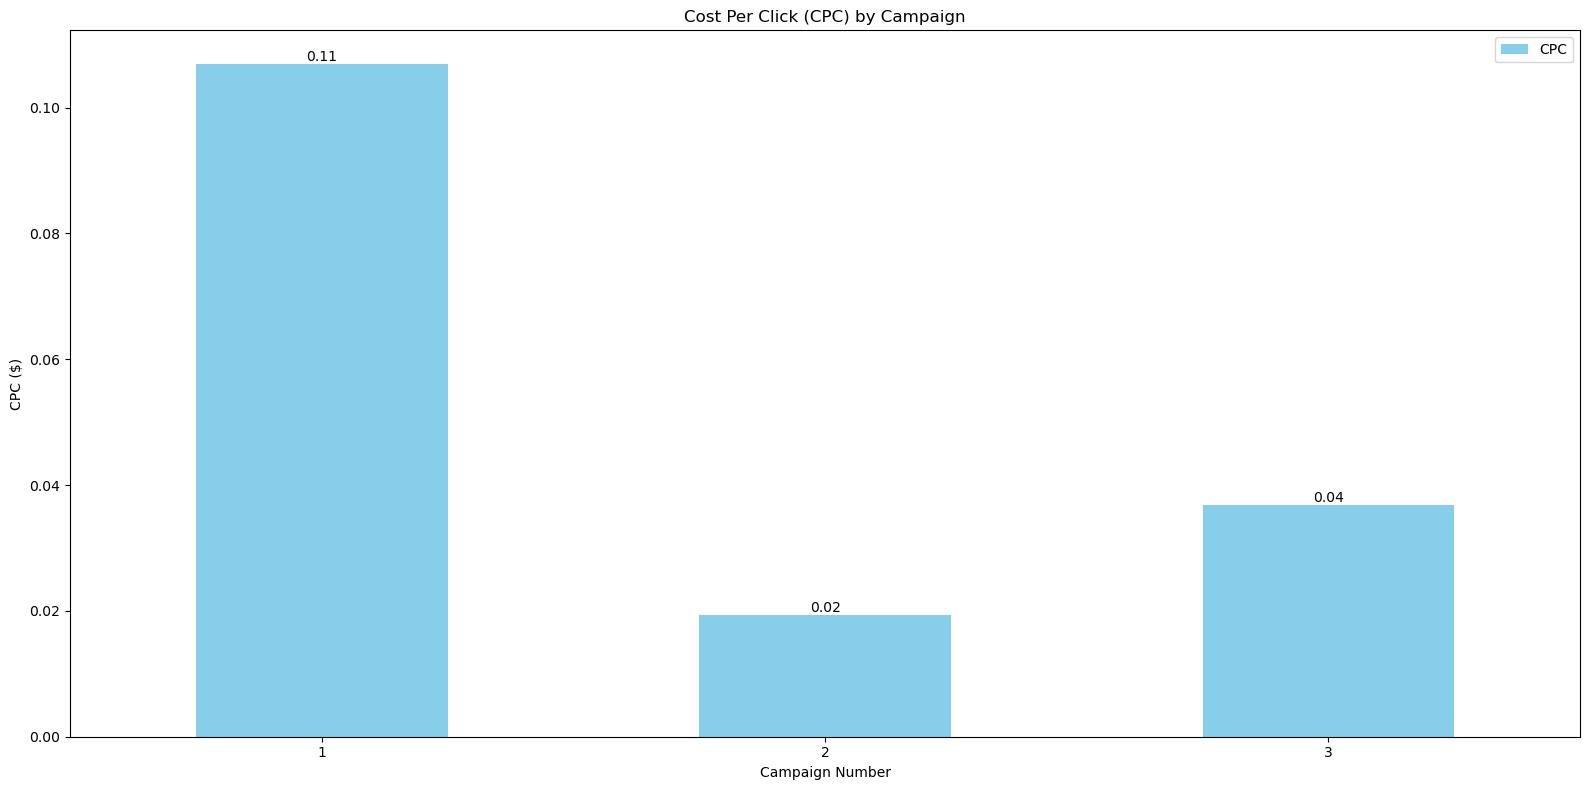

In [157]:
#Create a visulization of cost per click by campaign
cpc_campaign = df.groupby('campaign_number')[['cost', 'clicks']].sum().reset_index()
cpc_campaign['CPC'] = cpc_campaign['cost'] / cpc_campaign['clicks']

fid,ax = plt.subplots(figsize=(16, 8))
cpc_campaign.plot(kind='bar', x='campaign_number', y='CPC', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Cost Per Click (CPC) by Campaign')
ax.set_xlabel('Campaign Number')
ax.set_ylabel('CPC ($)')
ax.set_xticklabels(cpc_campaign['campaign_number'], rotation=0)
ax.legend(['CPC'], loc='upper right')

plt.tight_layout()
plt.show()


### Significant CPC Variation Across Campaigns

The data reveals substantial differences in cost efficiency across the three campaigns, with CPC values ranging from $0.02 to $0.11 — a 450% variation between the highest and lowest performing campaigns.

### Campaign Performance Breakdown

#### Campaign 1 – Highest Cost
- **CPC:** $0.11  
- **Status:** Most expensive campaign requiring immediate optimization  
- **Cost Impact:** 5.5x more expensive than the most efficient campaign

#### Campaign 2 – Most Efficient
- **CPC:** $0.02  
- **Status:** Best performing campaign from a cost perspective  
- **Benchmark:** Should serve as the efficiency standard for other campaigns

#### Campaign 3 – Moderate Cost
- **CPC:** $0.04  
- **Status:** Reasonable performance but with room for improvement  
- **Cost Impact:** 2x more expensive than Campaign 2


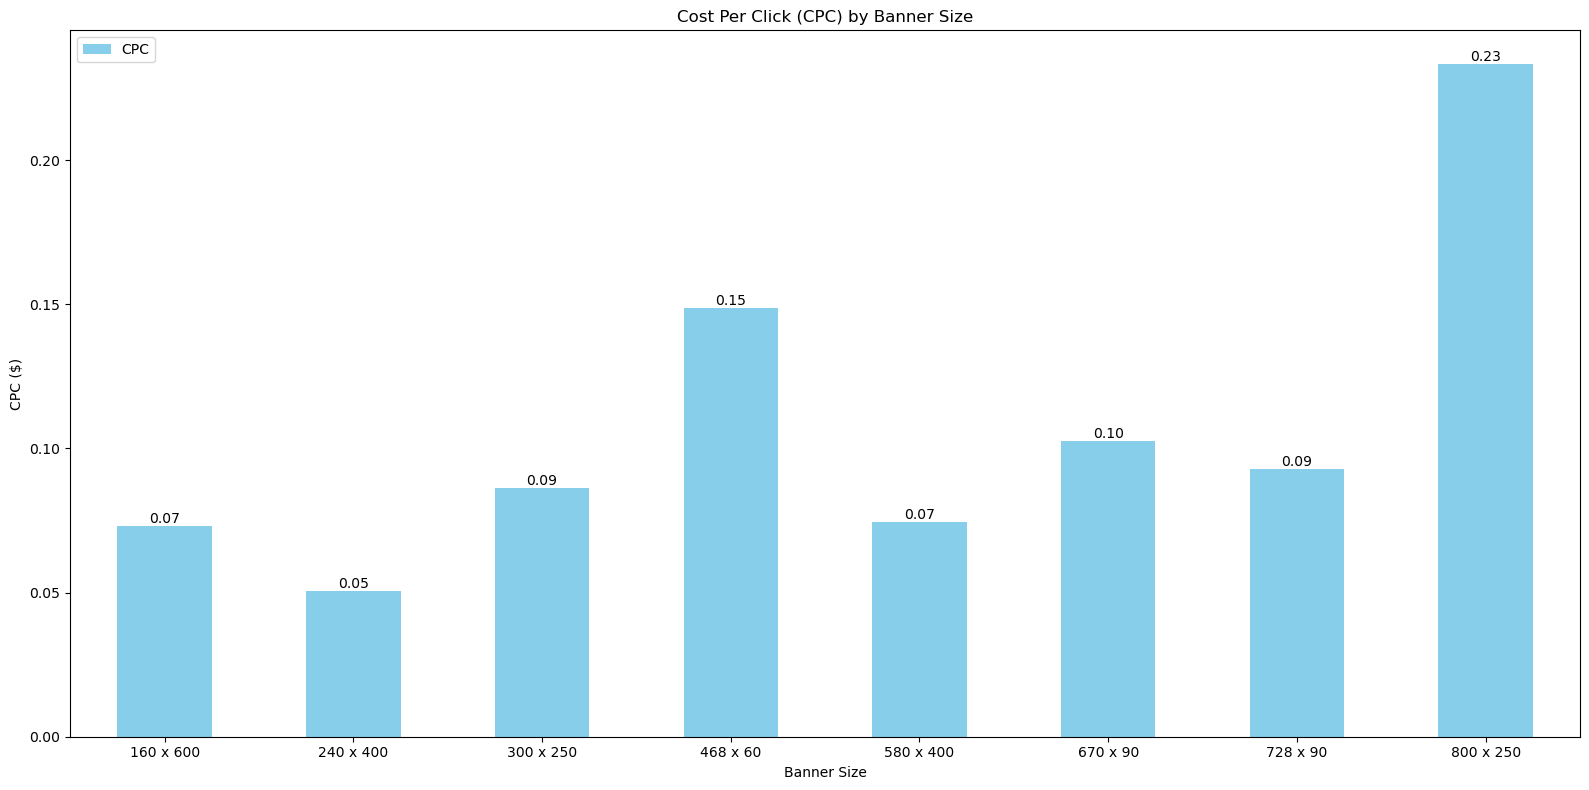

In [158]:
#Creating a visualization of cost per click by banner size
cpc_banner = df.groupby('banner_original')[['cost', 'clicks']].sum().reset_index()
cpc_banner['CPC'] = cpc_banner['cost'] / cpc_banner['clicks']

fig, ax = plt.subplots(figsize=(16, 8))
cpc_banner.plot(kind='bar', x='banner_original', y='CPC', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Cost Per Click (CPC) by Banner Size')
ax.set_xlabel('Banner Size')
ax.set_ylabel('CPC ($)')
ax.set_xticklabels(cpc_banner['banner_original'], rotation=0)

plt.tight_layout()
plt.show()

### Significant CPC Variation by Banner Format

The data reveals a **360% difference** between the most and least expensive banner sizes, with CPCs ranging from **$0.05 to $0.23**, indicating substantial cost efficiency variations across different ad formats.

### Banner Performance Breakdown

#### Most Cost-Efficient Banners
- **240 x 400:** $0.05 – Most efficient format, offering the lowest cost per click  
- **160 x 600 & 580 x 400:** $0.07 each – Highly efficient options with minimal cost difference

#### Moderately Priced Banners
- **300 x 250 & 728 x 90:** $0.09 each – Standard formats with reasonable efficiency  
- **670 x 90:** $0.10 – Slightly higher cost but still within acceptable range

#### Premium-Priced Banners
- **468 x 60:** $0.15 – Moderately expensive format  
- **800 x 250:** $0.23 – Most expensive banner size, requiring careful ROI evaluation

## Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

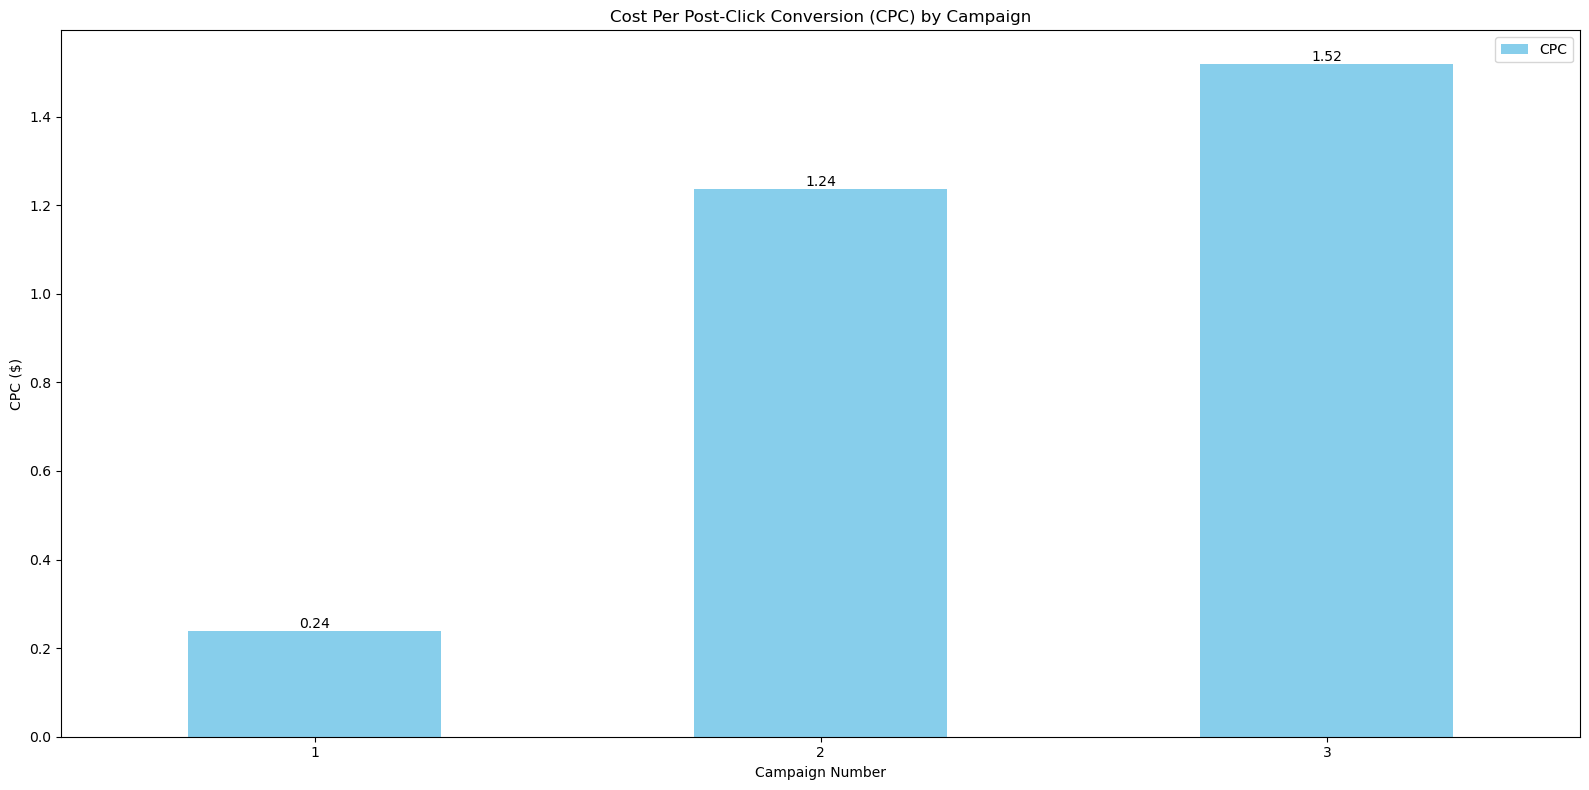

In [159]:
#Creating a visualization of cost per post-click conversion by campaign
cpc_conversion_campaign = df.groupby('campaign_number')[['cost', 'post_click_conversions']].sum().reset_index()
cpc_conversion_campaign['CPC'] = cpc_conversion_campaign['cost'] / cpc_conversion_campaign['post_click_conversions']

fig, ax = plt.subplots(figsize=(16, 8))
cpc_conversion_campaign.plot(kind='bar', x='campaign_number', y='CPC', ax=ax, color='skyblue')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Cost Per Post-Click Conversion (CPC) by Campaign')
ax.set_xlabel('Campaign Number')
ax.set_ylabel('CPC ($)')
ax.set_xticklabels(cpc_conversion_campaign['campaign_number'], rotation=0)
ax.legend(['CPC'], loc='upper right')

plt.tight_layout()
plt.show()

#### Campaign Performance Breakdown

##### Campaign 1 – Superior Efficiency

- **CPC (Click)**: `$0.11` (highest among all)
- **CPC (Post-Click Conversion)**: `$0.24`
- **Status**: Most cost-effective campaign for driving conversions
- **Benchmark**: Gold standard for conversion optimization
- **Insight**: Despite having the **highest CPC**, Campaign 1 delivers the **lowest cost per conversion** — a strong indicator of high-quality traffic and excellent post-click engagement.

##### Campaign 2 – Moderate Performance

- **CPC (Click)**: `$0.02`
- **CPC (Post-Click Conversion)**: `$1.24`
- **Status**: Average efficiency with room for improvement
- **Cost Impact**: `5.2×` more expensive per conversion than Campaign 1
- **Insight**: Although it enjoys the **lowest CPC**, Campaign 2’s high conversion cost reveals poor conversion efficiency — indicating potential issues with user intent, landing page, or CTA.

##### Campaign 3 – Poor Efficiency

- **CPC (Click)**: `$0.04`
- **CPC (Post-Click Conversion)**: `$1.52`
- **Status**: Least efficient campaign
- **Cost Impact**: `6.3×` higher than Campaign 1
- **Insight**: Despite mid-range click cost, Campaign 3 performs worst in conversion cost. Suggests wasted ad spend on low-converting traffic or a broken user funnel.

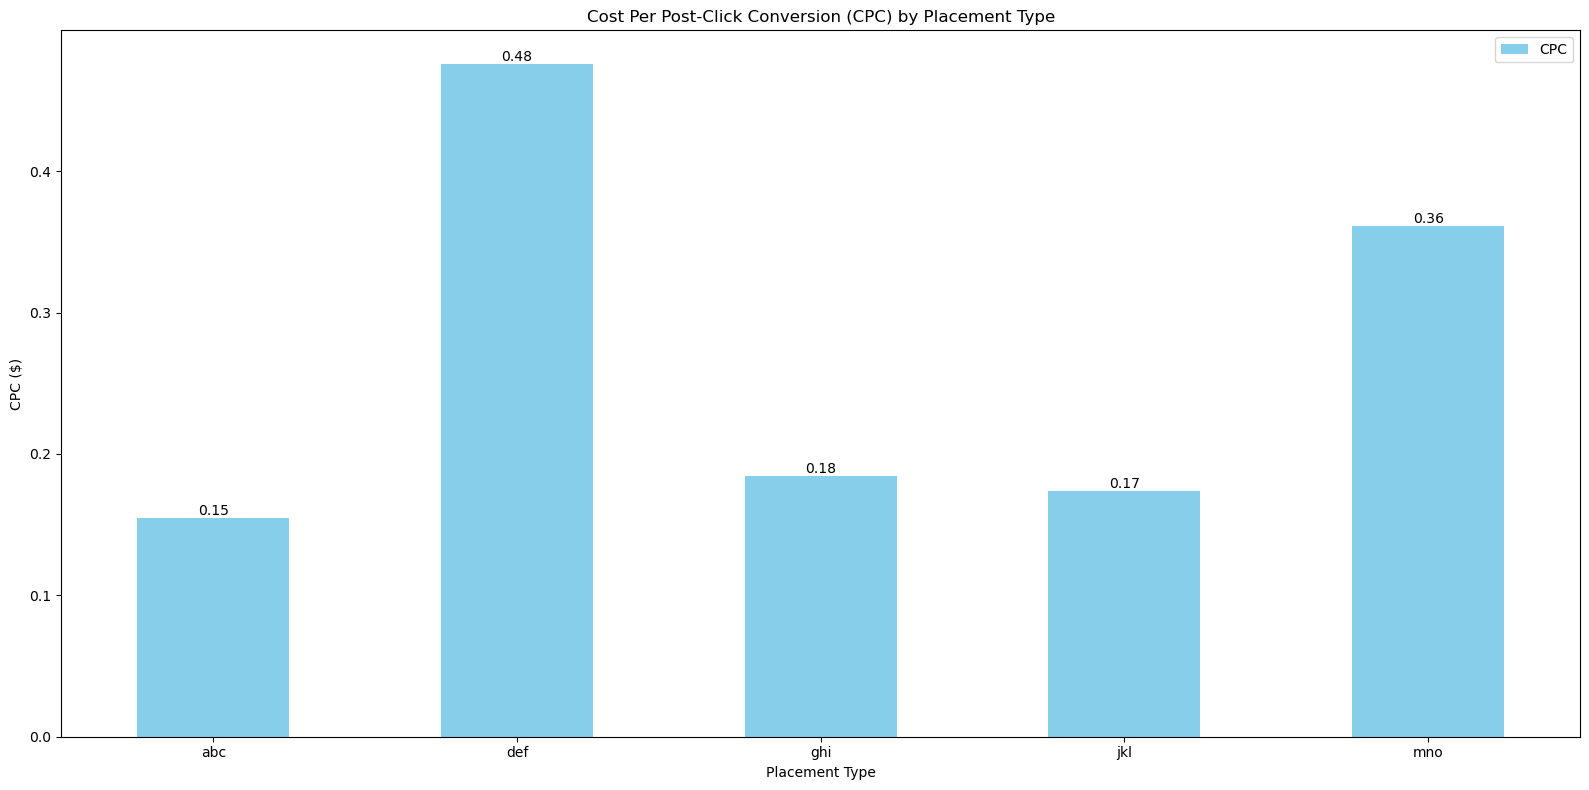

In [160]:
#Creating a visualization of cost per post click conversion by placement type
cpc_conversion_placement = df.groupby('placement_original')[['cost', 'post_click_conversions']].sum().reset_index()
cpc_conversion_placement['CPC'] = cpc_conversion_placement['cost'] / cpc_conversion_placement['post_click_conversions']

fig, ax = plt.subplots(figsize=(16, 8))
cpc_conversion_placement.plot(kind='bar', x='placement_original', y='CPC', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}', 
        ha='center', va='bottom', fontsize=10
    )
ax.set_title('Cost Per Post-Click Conversion (CPC) by Placement Type')
ax.set_xlabel('Placement Type')
ax.set_ylabel('CPC ($)')
ax.set_xticklabels(cpc_conversion_placement['placement_original'], rotation=0)
ax.legend(['CPC'], loc='upper right')
plt.tight_layout()
plt.show()

### Significant Conversion Efficiency Variation

The data reveals a **220% difference** between the most and least efficient placement types for driving conversions, with **costs ranging from $0.15 to $0.48 per conversion**.

#### Most Conversion-Efficient Placements

- **ABC**: `$0.15` – Best performing placement for conversion cost efficiency  
- **JKL**: `$0.17` – Second most efficient, offering excellent conversion ROI  
- **GHI**: `$0.18` – Strong conversion performance with competitive costs  

#### Moderate to Poor Conversion Efficiency

- **MNO**: `$0.36` – Higher conversion costs, requiring optimization review  
- **DEF**: `$0.48` – Poorest conversion efficiency, needs immediate attention  


## Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

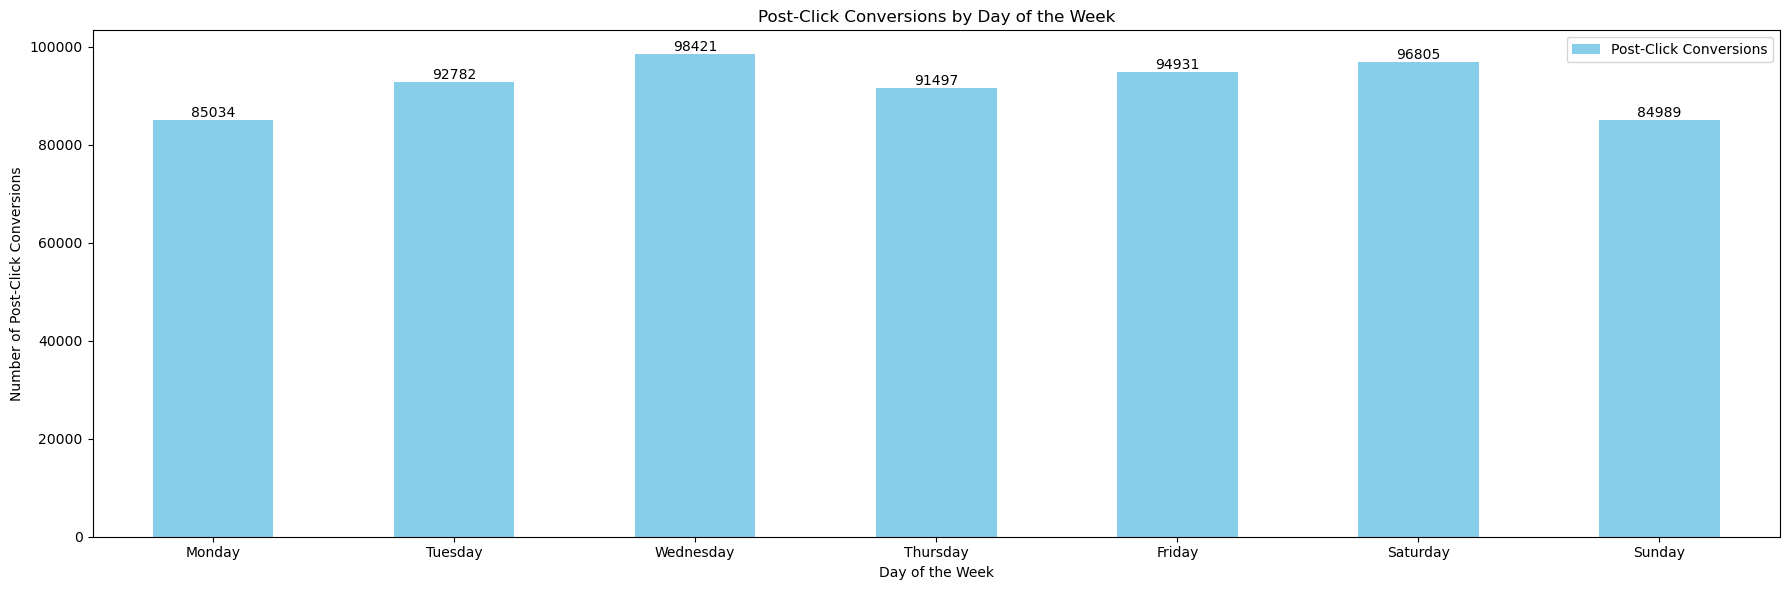

In [161]:
#Creating a visualization of post-click conversion rates by days of the week
df_valid['day_of_week'] = df_valid['date'].dt.day_name()

post_click_conversion_weekday = df_valid.groupby('day_of_week')['post_click_conversions'].sum().reset_index()

weekday_order = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

post_click_conversion_weekday['sort_key'] = post_click_conversion_weekday['day_of_week'].map(weekday_order)
post_click_conversion_weekday = post_click_conversion_weekday.sort_values('sort_key')

fig, ax = plt.subplots(figsize=(18, 6))
post_click_conversion_weekday.plot(kind='bar', x='day_of_week', y='post_click_conversions', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Post-Click Conversions by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Post-Click Conversions')
ax.set_xticklabels(post_click_conversion_weekday['day_of_week'], rotation=0)
ax.legend(['Post-Click Conversions'], loc='upper right')

plt.tight_layout()
plt.show()

### Weekly Conversion Performance Analysis

#### Peak Performance Days
- **Wednesday**: 98,421 conversions – *Highest performing day*, representing the weekly peak  
- **Saturday**: 96,805 conversions – *Strong weekend performance*, only 1.6% below Wednesday  
- **Friday**: 94,931 conversions – *Solid end-of-workweek momentum*

#### Moderate Performance Days
- **Tuesday**: 92,782 conversions – Building toward mid-week peak  
- **Thursday**: 91,497 conversions – *Notable 7% drop* after Wednesday's surge

#### Underperforming Days
- **Monday**: 85,034 conversions – *Weakest performance*, 13.6% below Wednesday  
- **Sunday**: 84,989 conversions – *Lowest overall*, marking the weekly trough

### Critical Analysis
- **Mid-Week Dominance**: Wednesday's leadership suggests users reach peak decision-making capacity mid-week, likely due to accumulated research and reduced Monday startup friction.  
- **Weekend Split**: Saturday's strong performance (96,805) versus Sunday’s weakness (84,989) indicates a sharp behavioral shift as users transition from leisure to preparation mode.  
- **Monday Motivation Gap**: The 13.6% deficit on Monday suggests lower user engagement and purchase intent at week’s start.

### Strategic Recommendations
1. **Budget Reallocation**: Shift 20–25% more budget to Wednesday–Friday window to capitalize on peak conversion periods  
2. **Weekend Strategy**: Maintain Saturday investment while reducing Sunday spend by 15–20%  
3. **Monday Recovery**: Implement awareness-focused campaigns on Monday to prime users for mid-week conversions  
4. **Dynamic Bidding**: Increase bid multipliers by 15% on Wednesday/Saturday, decrease by 10% on Sunday/Monday  

> **Performance Variance Insight**: A 15.8% gap between best (Wednesday) and worst (Sunday) days indicates significant optimization opportunity through day-of-week targeting adjustments.


## How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

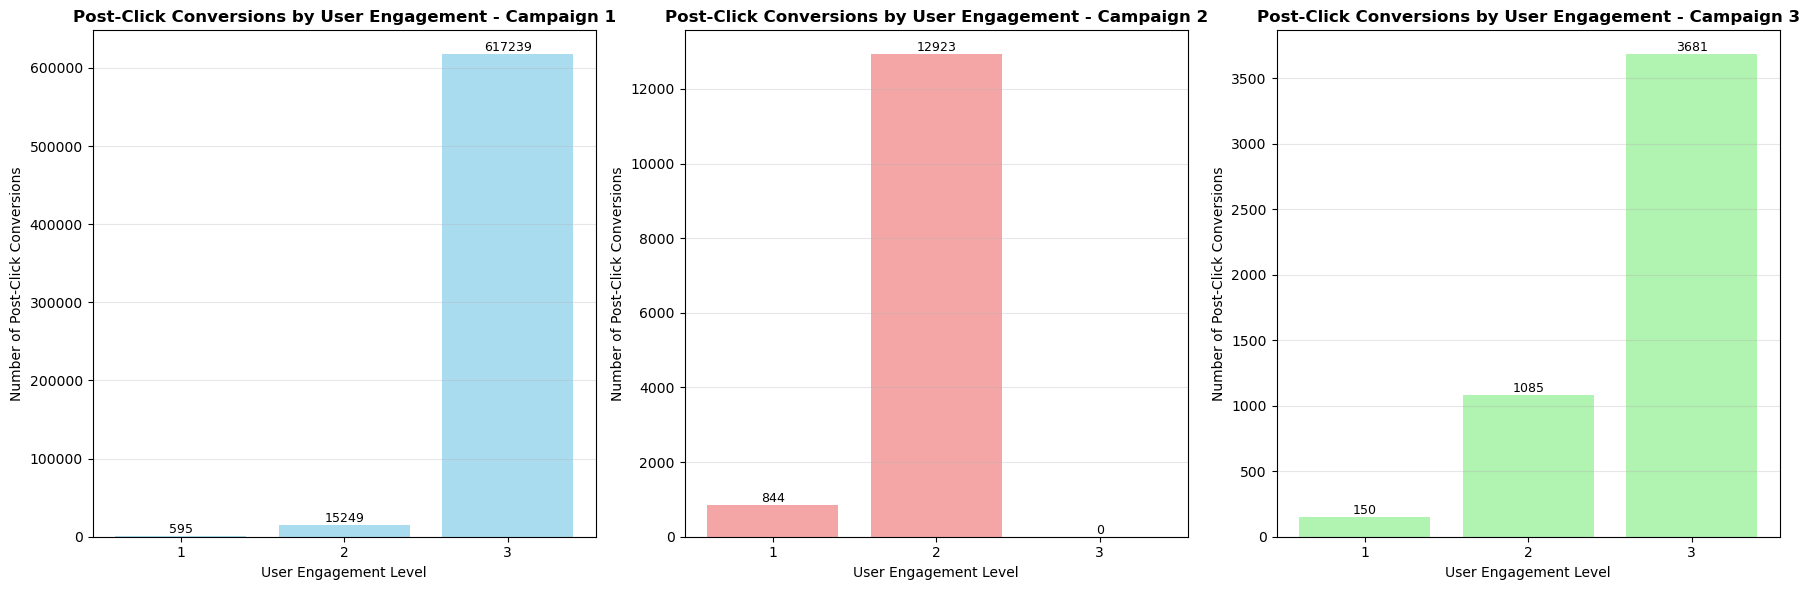

In [162]:
#Creating a visualization of user engagement types by post click conversions, individually for each campaign
user_engagement_campaign = df.groupby(['campaign_number', 'user_engagement'])['post_click_conversions'].sum().unstack().fillna(0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

campaigns = [1, 2, 3]
colors = ['skyblue', 'lightcoral', 'lightgreen']
for i, campaign in enumerate(campaigns):
    campaign_data = user_engagement_campaign.loc[campaign]
    
    bars = axes[i].bar(campaign_data.index, campaign_data.values, color=colors[i], alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    axes[i].set_title(f'Post-Click Conversions by User Engagement - Campaign {campaign}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('User Engagement Level')
    axes[i].set_ylabel('Number of Post-Click Conversions')
    axes[i].set_xticks([1, 2, 3])
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Campaign Performance Analysis by User Engagement Level

### Campaign 1 — High-Engagement Dominant Strategy
- **Level 1 (Low):** 595 conversions  
- **Level 2 (Medium):** 15,249 conversions  
- **Level 3 (High):** 617,239 conversions  

Campaign 1 demonstrates **exponential scaling**, with a massive **40x jump** from medium to high engagement. This represents the most successful campaign overall, generating **633,083 total conversions**. The strategy appears optimized for highly engaged users, suggesting premium positioning or complex value propositions that resonate with committed prospects.

### Campaign 2 — Medium-Engagement Focused
- **Level 1 (Low):** 844 conversions  
- **Level 2 (Medium):** 12,923 conversions  
- **Level 3 (High):** 0 conversions  

Campaign 2 shows a **bell-curve performance pattern**, peaking at medium engagement with **15x growth** from low to medium, then completely dropping off at high engagement. Total conversions: **13,767**. This suggests the campaign targets casual browsers but fails to convert serious prospects, possibly due to insufficient depth or premium appeal.

### Campaign 3 — Steady Linear Growth
- **Level 1 (Low):** 150 conversions  
- **Level 2 (Medium):** 1,085 conversions  
- **Level 3 (High):** 3,681 conversions  

Campaign 3 exhibits **consistent linear progression** with **7x growth** from low to medium and **3.4x growth** from medium to high engagement. Total conversions: **4,916**. While showing the most predictable scaling pattern, it delivers the lowest overall volume.

### Critical Analysis

**Campaign Effectiveness Hierarchy**:  
Campaign 1 massively outperforms others, generating **46x more conversions** than Campaign 2 and **129x more** than Campaign 3.

**Engagement Optimization Gaps**:  
Campaign 2's zero high-engagement conversions represent a critical failure to monetize the most valuable user segment.

**Scaling Patterns**:  
Only Campaign 1 successfully converts engagement into substantial revenue, while Campaigns 2 and 3 show limited scalability.

### Strategic Recommendations

1. **Resource Reallocation**: Shift 70–80% of budget to Campaign 1 strategy, given its superior high-engagement performance.
2. **Campaign 2 Redesign**: Investigate why high-engagement users abandon Campaign 2; add premium elements or deeper value propositions.
3. **Campaign 3 Enhancement**: Scale successful linear model with increased investment to boost baseline performance.
4. **Engagement Targeting**: Focus Campaign 1 on high-engagement audiences, Campaign 2 on medium-engagement, and retire underperforming strategies.

**Key Insight**:  
High-engagement users drive **94% of Campaign 1’s success**, indicating premium positioning and sophisticated targeting yield exponentially better results than broad-appeal strategies.
